In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.model_selection import train_test_split

import os

print(os.listdir("../data"))  # lists files in the current folder


['age_gender_bkts.csv', 'countries.csv', 'sample_submission_NDF.csv', 'sessions.csv', 'test_users.csv', 'train_users_2.csv']


In [4]:
#  data from csv files is imported to  pandas data frames
data_train_org = pd.read_csv("../data/train_users_2.csv")
print(data_train_org.columns)
data_train_org=data_train_org.sort_values(by='timestamp_first_active')

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [5]:
print(data_train_org.shape)

(213451, 16)


In [6]:
data_train, data_test = train_test_split(data_train_org, test_size=0.2)
data_train_copy = data_train
print("%d items in training data, %d in test data" % (len(data_train), len(data_test)))

170760 items in training data, 42691 in test data


In [7]:
# Removing the date_first_booking column from data_train and data_test
print(data_train.columns)

data_train = data_train.drop('date_first_booking', axis=1)
data_test  = data_test.drop('date_first_booking', axis=1)

data_train = data_train.sort_values(by='timestamp_first_active')
data_test  = data_test.sort_values(by='timestamp_first_active')


Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [8]:
#replacing gender and age values which are not present to Nan
data_train.loc[:, "gender"] = data_train["gender"].replace("-unknown-", np.nan)
data_test.loc[:, "gender"]  = data_test["gender"].replace("-unknown-", np.nan)

data_train.loc[:, "age"] = data_train["age"].replace("NaN", np.nan)
data_test.loc[:, "age"]  = data_test["age"].replace("NaN", np.nan)
print(data_train.head())

           id date_account_created  timestamp_first_active  gender   age  \
2  4ft3gnwmtx           2010-09-28          20090609231247  FEMALE  56.0   
4  87mebub9p4           2010-09-14          20091208061105     NaN  41.0   
5  osr2jwljor           2010-01-01          20100101215619     NaN   NaN   
7  0d01nltbrs           2010-01-03          20100103191905  FEMALE  47.0   
8  a1vcnhxeij           2010-01-04          20100104004211  FEMALE  50.0   

  signup_method  signup_flow language affiliate_channel affiliate_provider  \
2         basic            3       en            direct             direct   
4         basic            0       en            direct             direct   
5         basic            0       en             other              other   
7         basic            0       en            direct             direct   
8         basic            0       en             other         craigslist   

  first_affiliate_tracked signup_app first_device_type first_browser  \
2 

# Missing Data

In [10]:
train_users = pd.read_csv('../data/train_users_2.csv')
test_users = pd.read_csv('../data/test_users.csv')
print("There were", train_users.shape[0], "users in the training set and", test_users.shape[0], "in the test set.")
print("In total there were", train_users.shape[0] + test_users.shape[0], "users.")

df = pd.concat((train_users, test_users), axis=0, ignore_index=True)

df.isnull().sum()


There were 213451 users in the training set and 62096 in the test set.
In total there were 275547 users.


id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
dtype: int64

In [11]:
df.head(10)


id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   
5  osr2jwljor           2010-01-01          20100101215619         2010-01-02   
6  lsw9q7uk0j           2010-01-02          20100102012558         2010-01-05   
7  0d01nltbrs           2010-01-03          20100103191905         2010-01-13   
8  a1vcnhxeij           2010-01-04          20100104004211         2010-07-29   
9  6uh8zyj2gn           2010-01-04          20100104023758         2010-01-04   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   
5  -unknown-   NaN         basic            0       en             other   
6     FEMALE  46.0         basic            0       en             other   
7     FEMALE  47.0         basic            0       en            direct   
8     FEMALE  50.0         basic            0       en             other   
9  -unknown-  46.0         basic            0       en             other   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   
5              other                     omg        Web       Mac Desktop   
6         craigslist               untracked        Web       Mac Desktop   
7             direct                     omg        Web       Mac Desktop   
8         craigslist               untracked        Web       Mac Desktop   
9         craigslist                     omg        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NDF  
1        Chrome                 NDF  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US  
5        Chrome                  US  
6        Safari                  US  
7        Safari                  US  
8        Safari                  US  
9       Firefox                  US

In [12]:
df['gender'].unique(), df['first_browser'].unique()


(array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object),
 array(['Chrome', 'IE', 'Firefox', 'Safari', '-unknown-', 'Mobile Safari',
        'Chrome Mobile', 'RockMelt', 'Chromium', 'Android Browser',
        'AOL Explorer', 'Palm Pre web browser', 'Mobile Firefox', 'Opera',
        'TenFourFox', 'IE Mobile', 'Apple Mail', 'Silk', 'Camino', 'Arora',
        'BlackBerry Browser', 'SeaMonkey', 'Iron', 'Sogou Explorer',
        'IceWeasel', 'Opera Mini', 'SiteKiosk', 'Maxthon',
        'Kindle Browser', 'CoolNovo', 'Conkeror', 'wOSBrowser',
        'Google Earth', 'Crazy Browser', 'Mozilla', 'OmniWeb',
        'PS Vita browser', 'NetNewsWire', 'CometBird', 'Comodo Dragon',
        'Flock', 'Pale Moon', 'Avant Browser', 'Opera Mobile',
        'Yandex.Browser', 'TheWorld Browser', 'SlimBrowser', 'Epic',
        'Stainless', 'Googlebot', 'Outlook 2007', 'IceDragon', 'IBrowse',
        'Nintendo Browser', 'UC Browser'], dtype=object))

In [ ]:
df['gender'] = df['gender'].replace('-unknown-', np.nan)
df['first_browser'] = df['first_browser'].replace('-unknown-', np.nan)


In [ ]:
df.isnull().sum()


id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                     129480
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser               44394
country_destination         62096
dtype: int64

In [ ]:
df.drop('date_first_booking', axis=1, inplace=True)


In [ ]:
df.isnull().sum()


id                              0
date_account_created            0
timestamp_first_active          0
gender                     129480
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser               44394
country_destination         62096
dtype: int64

# User's Age

In [ ]:
df.age.describe()


count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [ ]:
df.loc[df['age'] > 1000]['age'].describe()


count     828.000000
mean     2007.117150
std        22.219408
min      1920.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [ ]:
df.loc[df['age'] < 18]['age'].describe()


count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [ ]:
df_with_year = df['age'] > 1000
df.loc[df_with_year, 'age'] = 2015 - df.loc[df_with_year, 'age']

In [ ]:
df.age.describe()


count    158681.000000
mean         36.713274
std          14.046364
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max         150.000000
Name: age, dtype: float64

In [ ]:
df.loc[df.age > 95, 'age'] = np.nan
df.loc[df.age < 16, 'age'] = np.nan

In [ ]:
df['age'].describe()


count    155887.000000
mean         36.033370
std          11.589997
min          16.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

C:\Users\ralma\AppData\Local\Temp\ipykernel_8448\1681966765.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age.dropna(), rug=True)


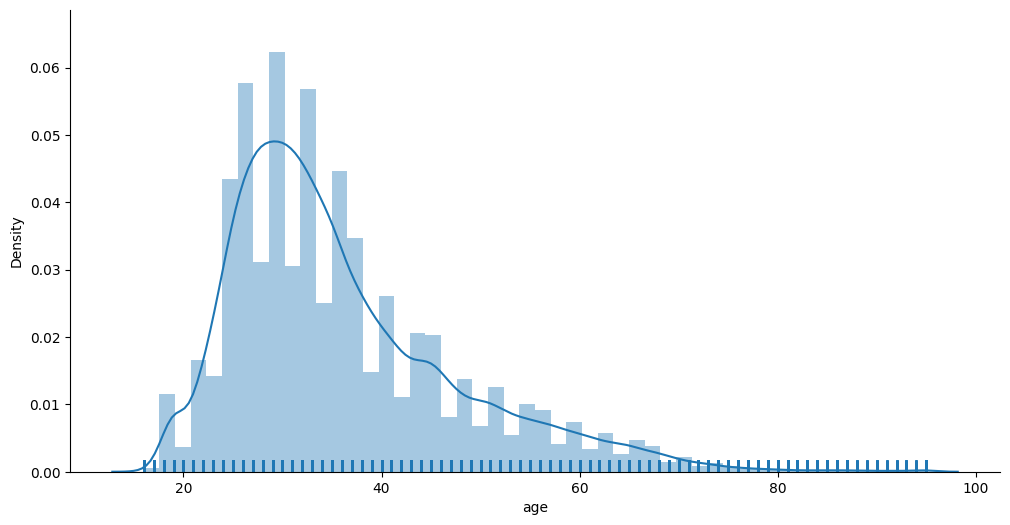

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df.age.dropna(), rug=True)
sns.despine()

As expected, the most common age of Airbnb users is between 25 and 40.



# User's Gender

In [ ]:
df.head()


id date_account_created  timestamp_first_active  gender   age  \
0  gxn3p5htnn           2010-06-28          20090319043255     NaN   NaN   
1  820tgsjxq7           2011-05-25          20090523174809    MALE  38.0   
2  4ft3gnwmtx           2010-09-28          20090609231247  FEMALE  56.0   
3  bjjt8pjhuk           2011-12-05          20091031060129  FEMALE  42.0   
4  87mebub9p4           2010-09-14          20091208061105     NaN  41.0   

  signup_method  signup_flow language affiliate_channel affiliate_provider  \
0      facebook            0       en            direct             direct   
1      facebook            0       en               seo             google   
2         basic            3       en            direct             direct   
3      facebook            0       en            direct             direct   
4         basic            0       en            direct             direct   

  first_affiliate_tracked signup_app first_device_type first_browser  \
0               untracked        Web       Mac Desktop        Chrome   
1               untracked        Web       Mac Desktop        Chrome   
2               untracked        Web   Windows Desktop            IE   
3               untracked        Web       Mac Desktop       Firefox   
4               untracked        Web       Mac Desktop        Chrome   

  country_destination  
0                 NDF  
1                 NDF  
2                  US  
3               other  
4                  US

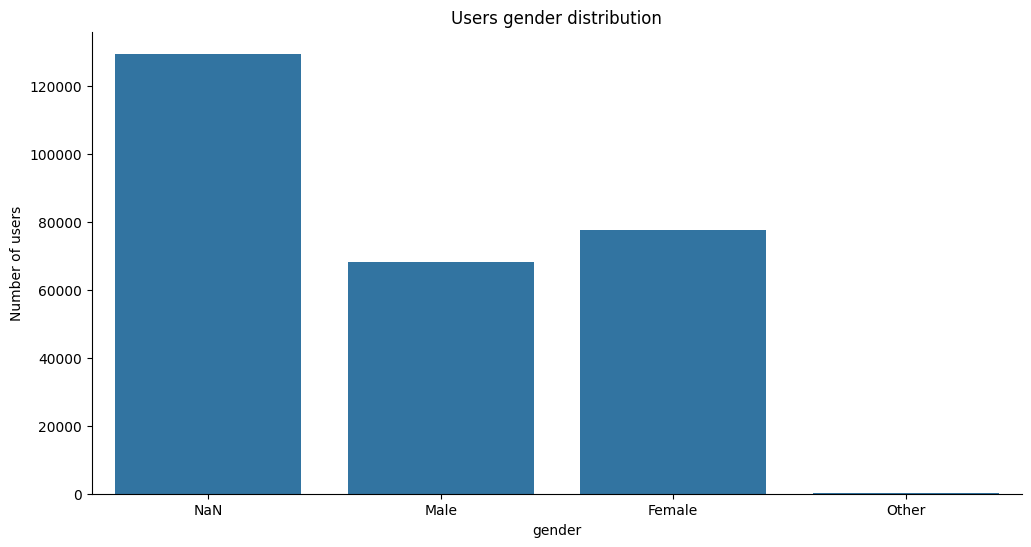

In [ ]:
plt.figure(figsize=(12,6))
df["gender"] = df['gender'].fillna('M')
sns.countplot(data=df, x='gender')
plt.xticks(np.arange(4), ("NaN", "Male", "Female", "Other"))
plt.ylabel('Number of users')
plt.title('Users gender distribution')
sns.despine()

Approx. 45% of users' gender were not presented. And there is no significant difference between female and male users on Airbnb's platform.

# Travel Destination Country

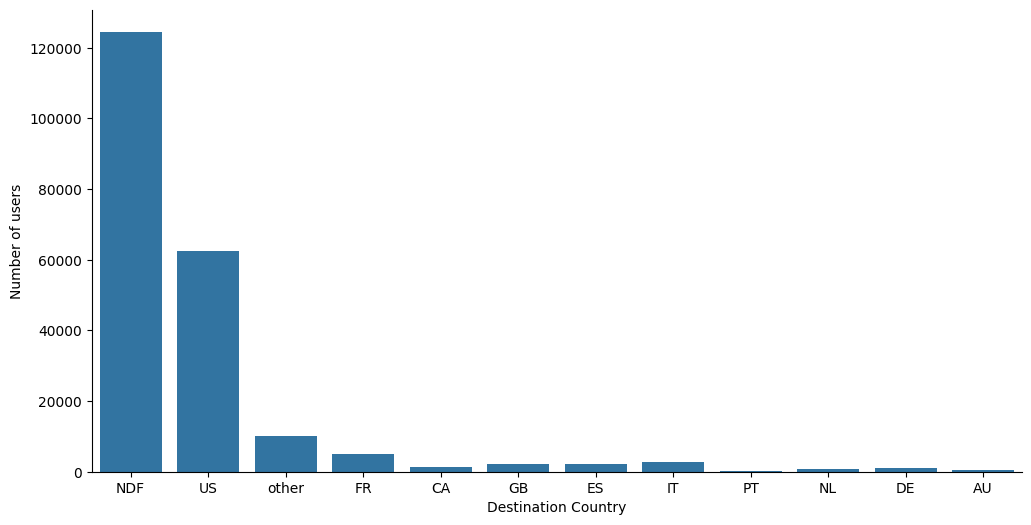

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df)
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
sns.despine()

Nearly 60% of users did not book any destination (NDF). The most booked country is the US (nearly 30% of all users booked US), given all users in the data set are from the US. We can say that users in the dataset are more likely to travel within the US. We will only study users who made at least one reservation, and removing users who did not book any destination.

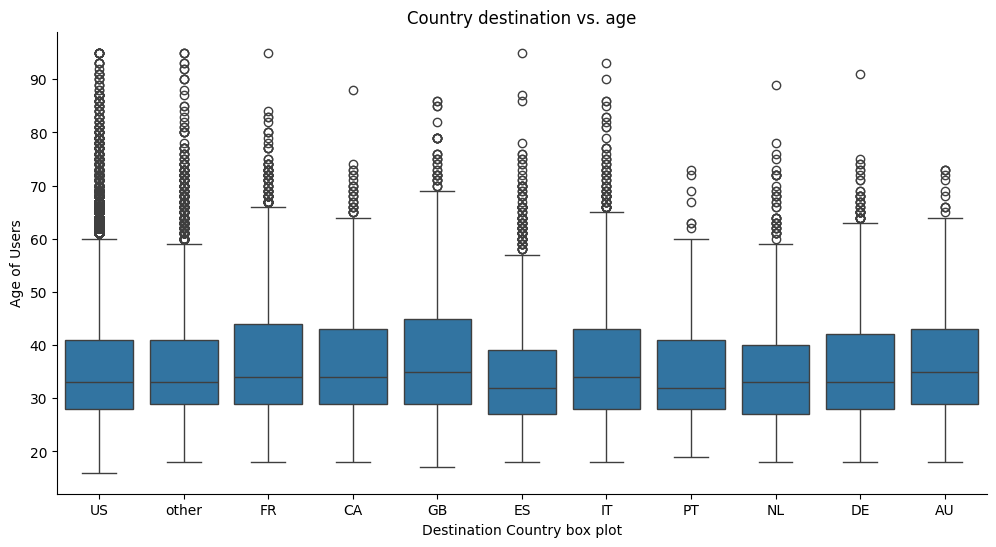

In [ ]:
plt.figure(figsize=(12,6))
df_without_NDF = df[df['country_destination']!='NDF']
sns.boxplot(y='age' , x='country_destination',data=df_without_NDF)
plt.xlabel('Destination Country box plot')
plt.ylabel('Age of Users')
plt.title('Country destination vs. age')
sns.despine()

There were no significant age difference among users who book difference destinations. However, users who booked Great Britain tend to be a little older than users who booked Spain and Portugal.

# User's Signup

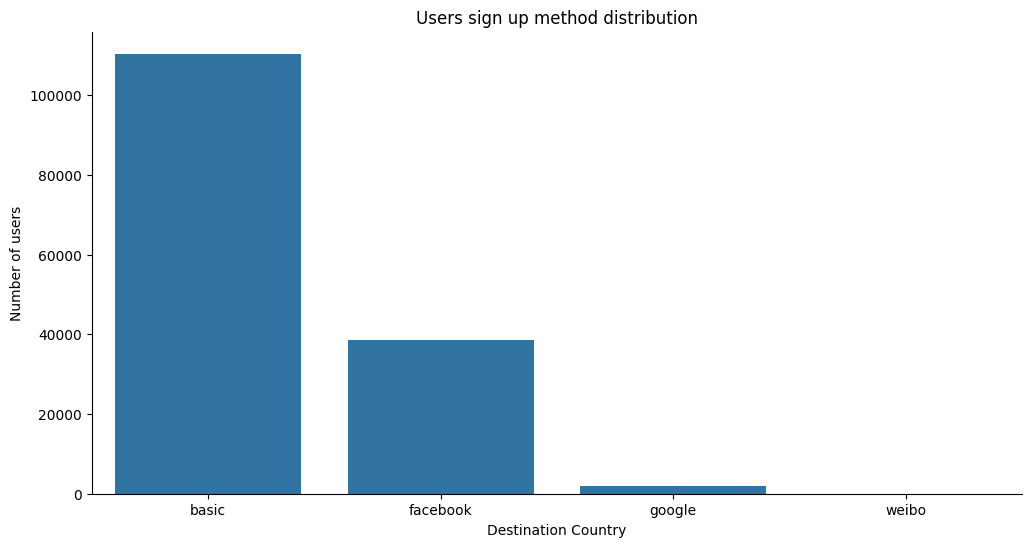

In [ ]:
plt.figure(figsize=(12,6))
df_without_NDF = df[df['country_destination']!='NDF']
sns.countplot(x='signup_method', data = df_without_NDF)
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Users sign up method distribution')
sns.despine()

Over 70% of all bookers in the data used basic email method to sign up with Airbnb, and less than 30% of bookers used their facebook account to sign up, approx. only 0.26% of the bookers in the data used their Google accounts to sign up.

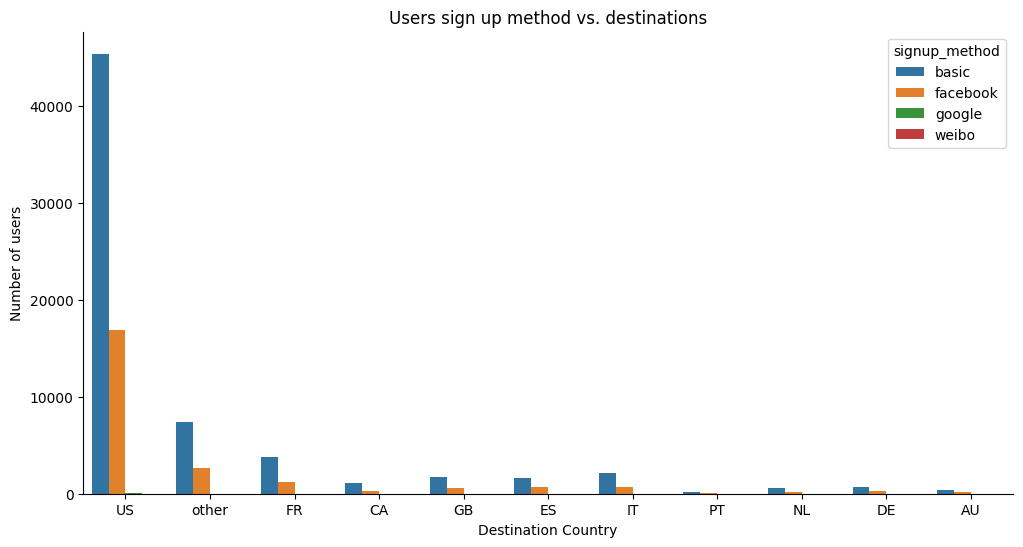

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data = df_without_NDF, hue = 'signup_method')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Users sign up method vs. destinations')
sns.despine()

For users who made booking at least once, most of them signed up with Airbnb through basic email method, no matter which country they were travelling to.

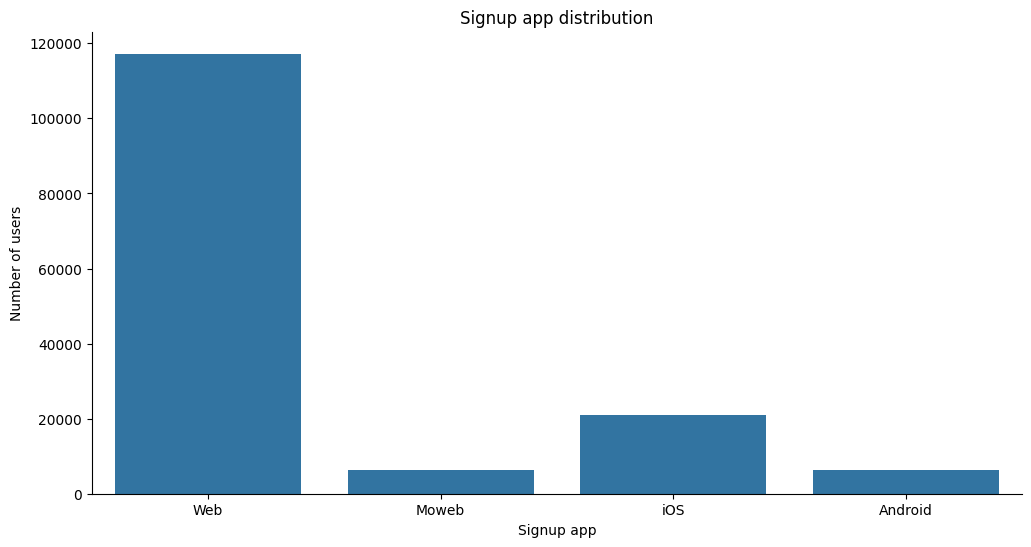

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='signup_app', data=df_without_NDF)
plt.xlabel('Signup app')
plt.ylabel('Number of users')
plt.title('Signup app distribution')
sns.despine()

Over 85% of all bookers in the data set signed up on Airbnb's website, over 10% of all bookers signed up with iOs.



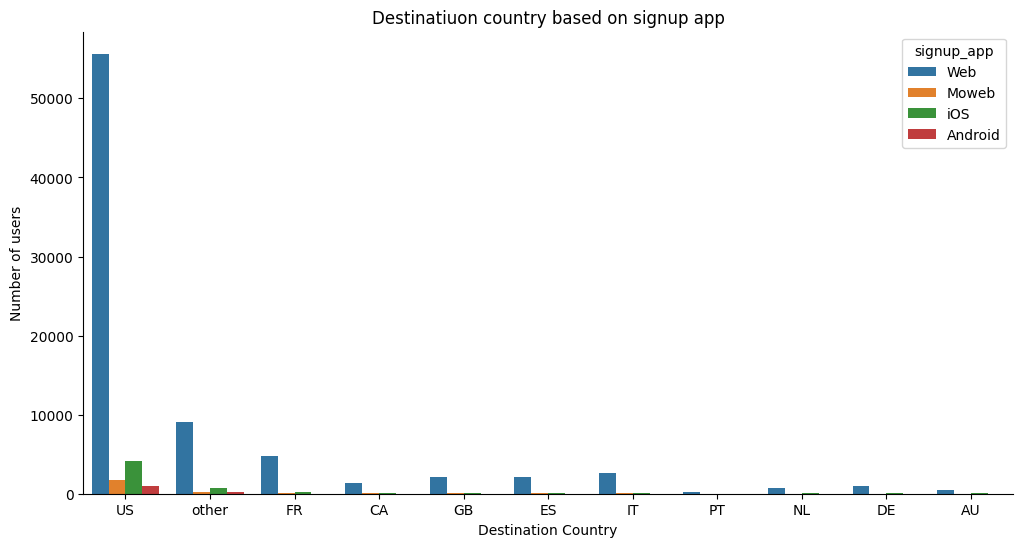

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF, hue='signup_app')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Destinatiuon country based on signup app')
sns.despine()

US bookers have more variety of sign up apps than bookers in other countries. To see more clearer, we remove the US.



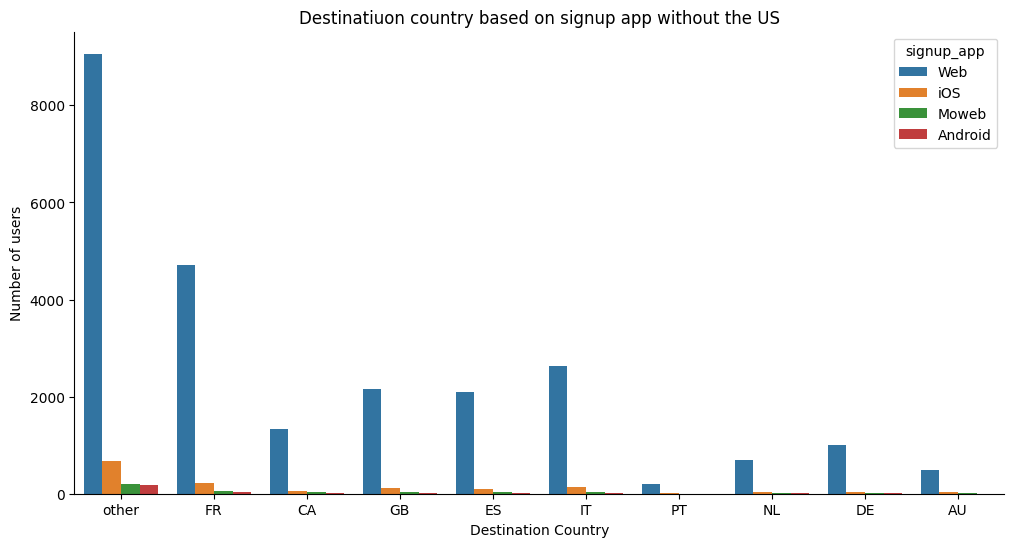

In [ ]:
df_without_NDF_US = df_without_NDF[df_without_NDF['country_destination']!='US']
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF_US, hue='signup_app')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Destinatiuon country based on signup app without the US')
sns.despine()

Signing up through Airbnb website is the most common sign up on booking every destination country in the data.



# Affiliate

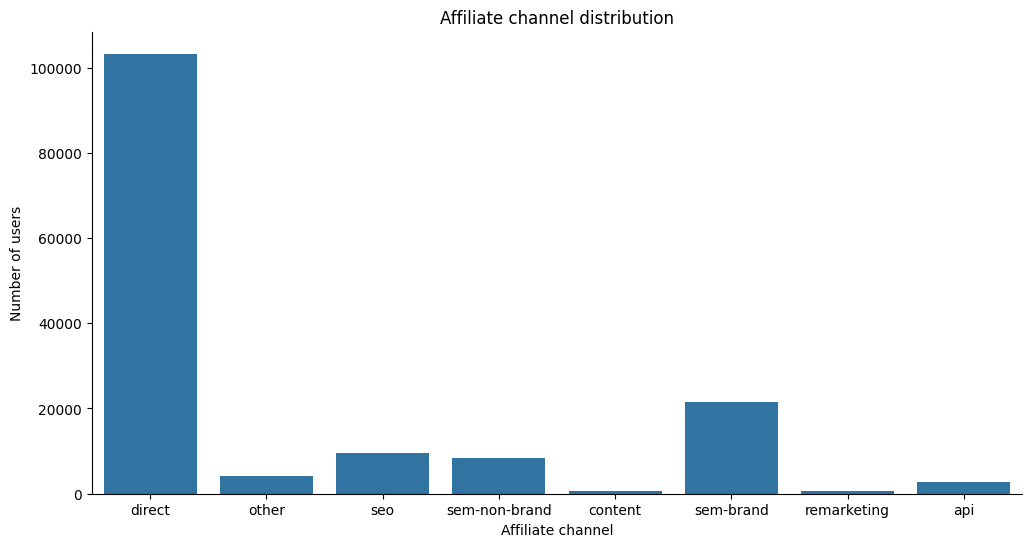

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='affiliate_channel', data=df_without_NDF)
plt.xlabel('Affiliate channel')
plt.ylabel('Number of users')
plt.title('Affiliate channel distribution')
sns.despine()

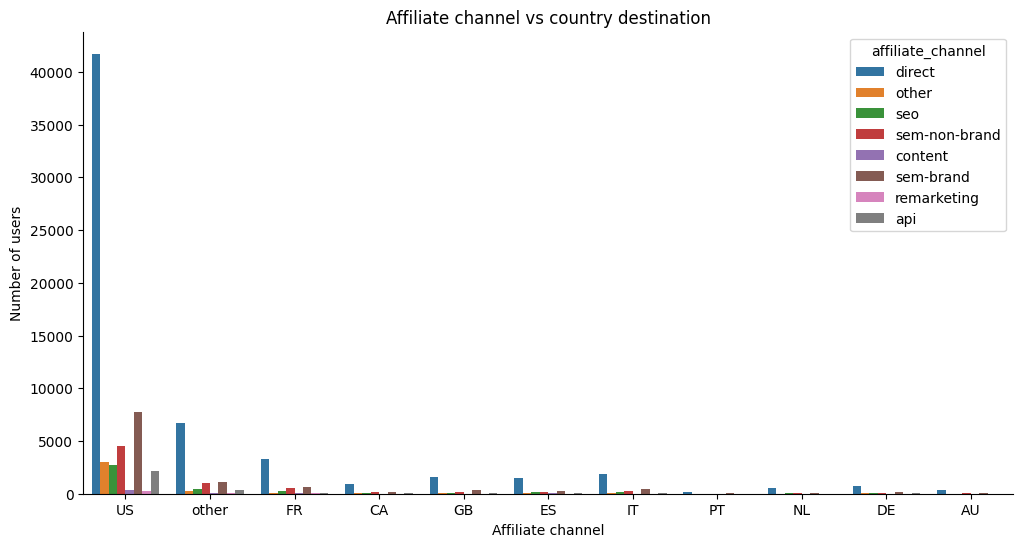

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF, hue = 'affiliate_channel')
plt.xlabel('Affiliate channel')
plt.ylabel('Number of users')
plt.title('Affiliate channel vs country destination')
sns.despine()

Let's remove the US again.



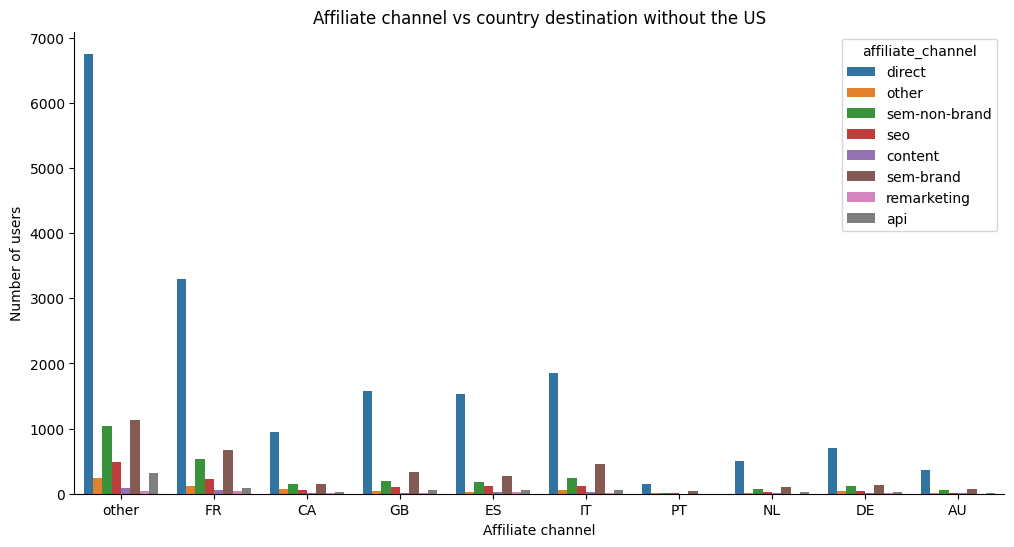

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF_US, hue = 'affiliate_channel')
plt.xlabel('Affiliate channel')
plt.ylabel('Number of users')
plt.title('Affiliate channel vs country destination without the US')
sns.despine()

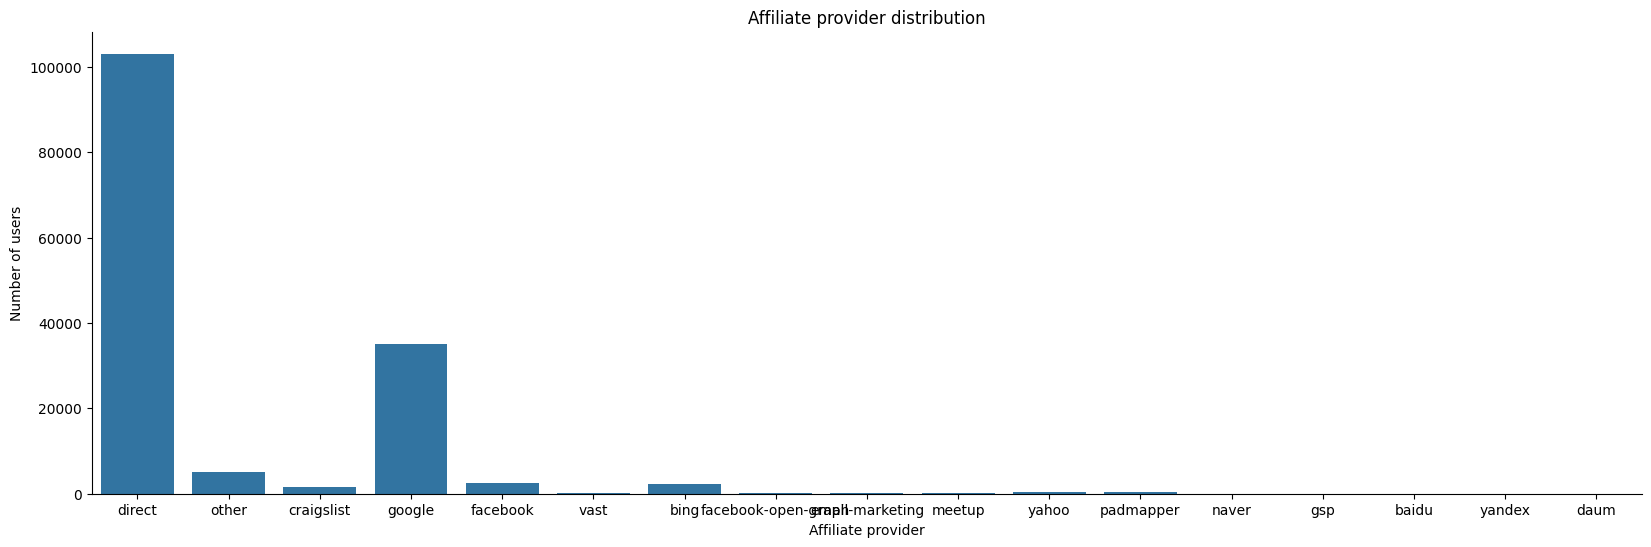

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='affiliate_provider', data=df_without_NDF)
plt.xlabel('Affiliate provider')
plt.ylabel('Number of users')
plt.title('Affiliate provider distribution')
sns.despine()

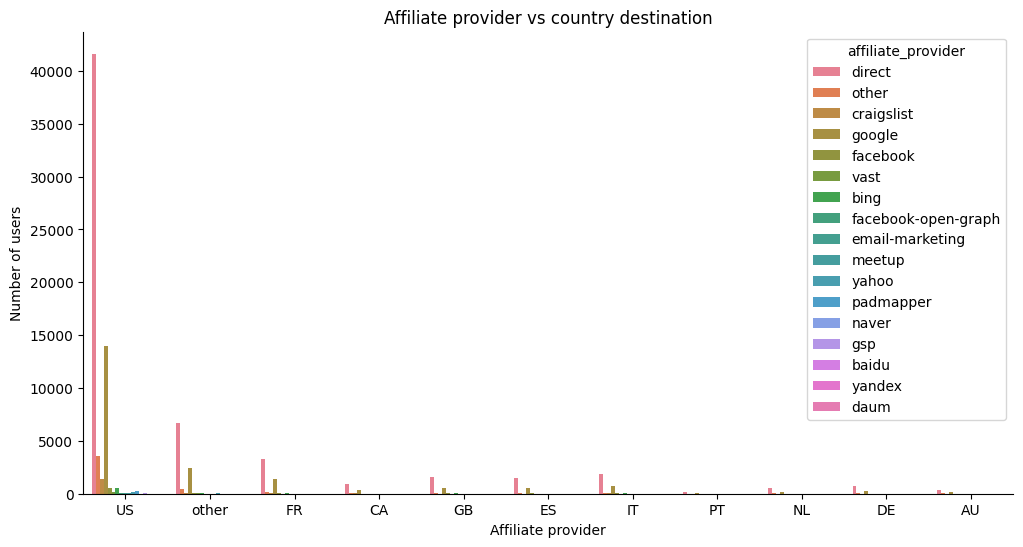

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF, hue = 'affiliate_provider')
plt.xlabel('Affiliate provider')
plt.ylabel('Number of users')
plt.title('Affiliate provider vs country destination')
sns.despine()

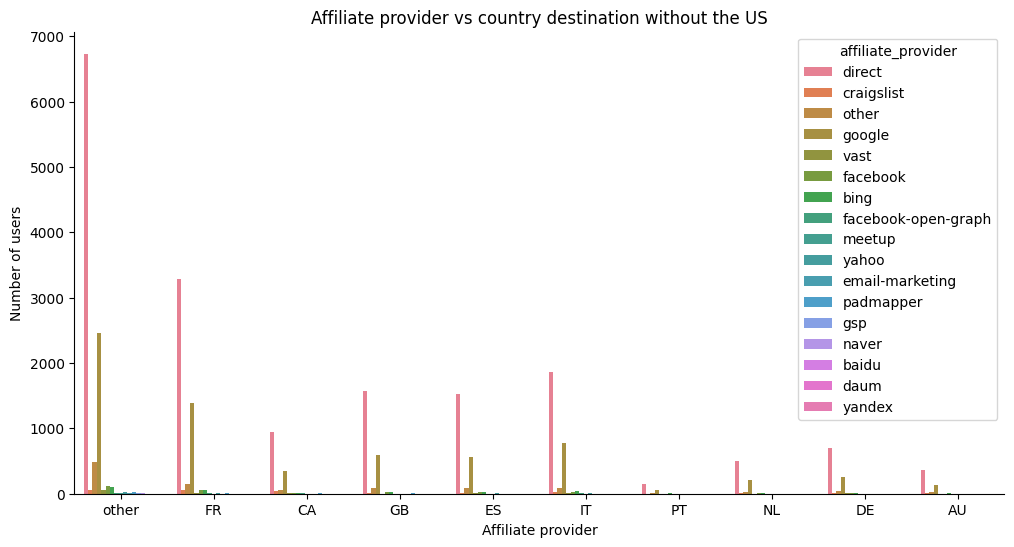

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF_US, hue = 'affiliate_provider')
plt.xlabel('Affiliate provider')
plt.ylabel('Number of users')
plt.title('Affiliate provider vs country destination without the US')
sns.despine()

Approx. 65% of bookers signed up directly, without any affiliate program. And over 23% of bookers signed up through Google affiliate program, however, if you remember, there were only 0.26% of bookers signed up with their Google accounts.

# First

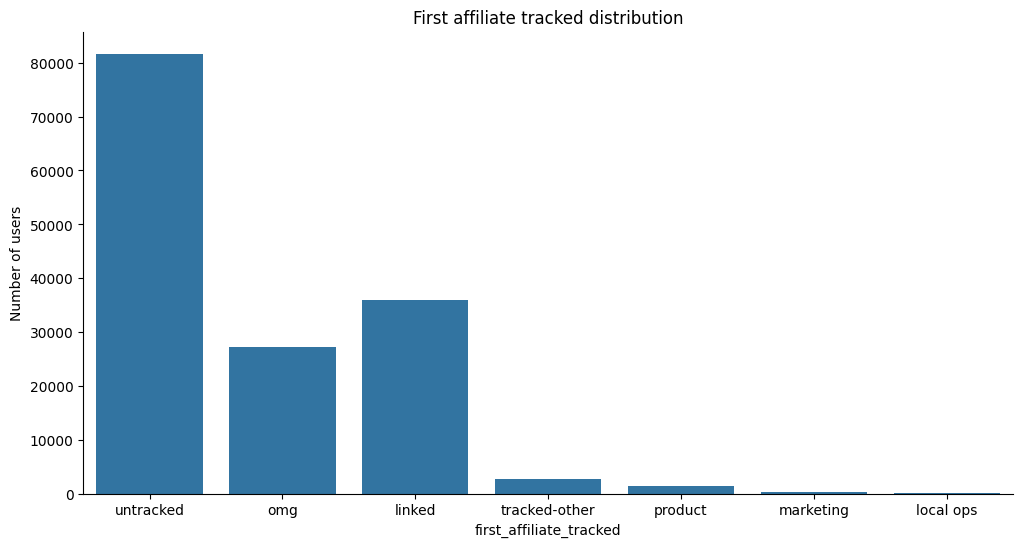

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='first_affiliate_tracked', data=df_without_NDF)
plt.ylabel('Number of users')
plt.title('First affiliate tracked distribution')
sns.despine()

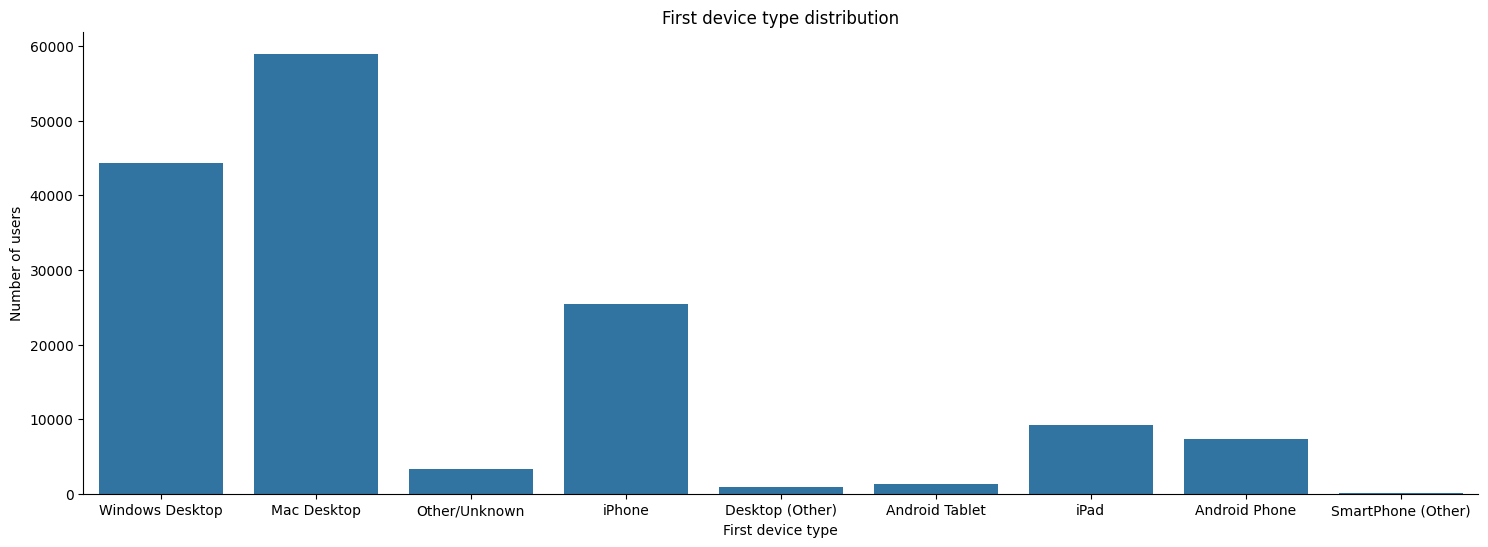

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='first_device_type', data=df_without_NDF)
plt.xlabel('First device type')
plt.ylabel('Number of users')
plt.title('First device type distribution')
sns.despine()

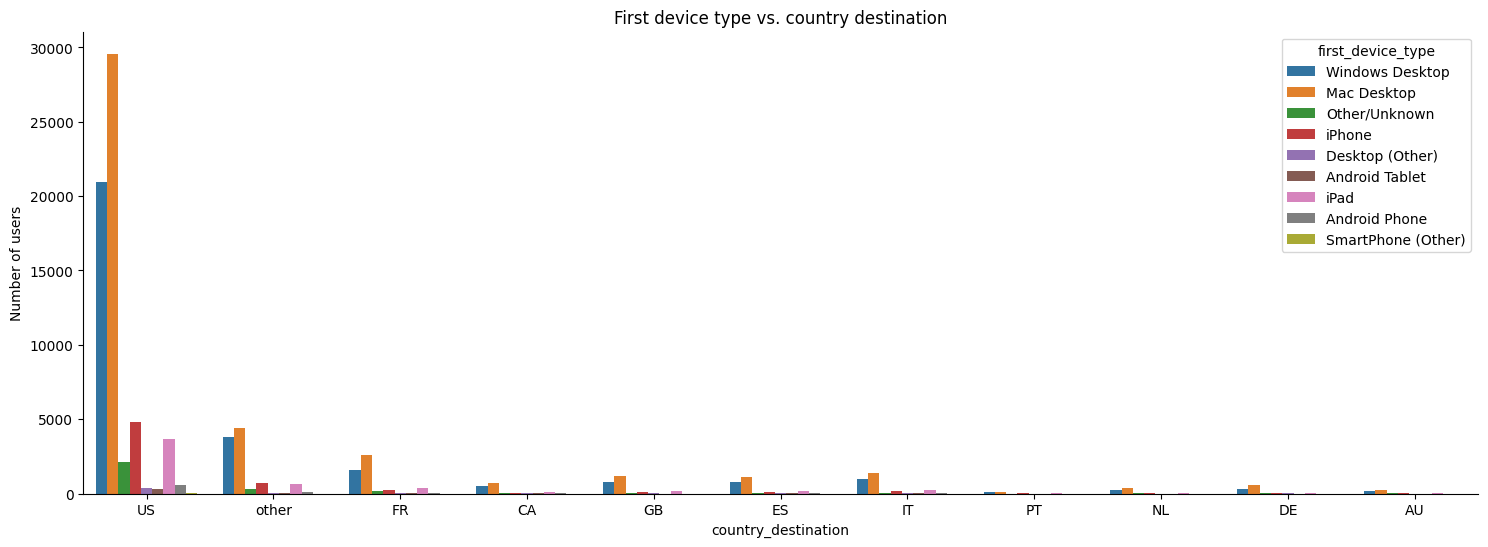

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=df_without_NDF, hue='first_device_type')
plt.ylabel('Number of users')
plt.title('First device type vs. country destination')
sns.despine()

Around 60% of bookers use Apple devices. Particularly in the US.



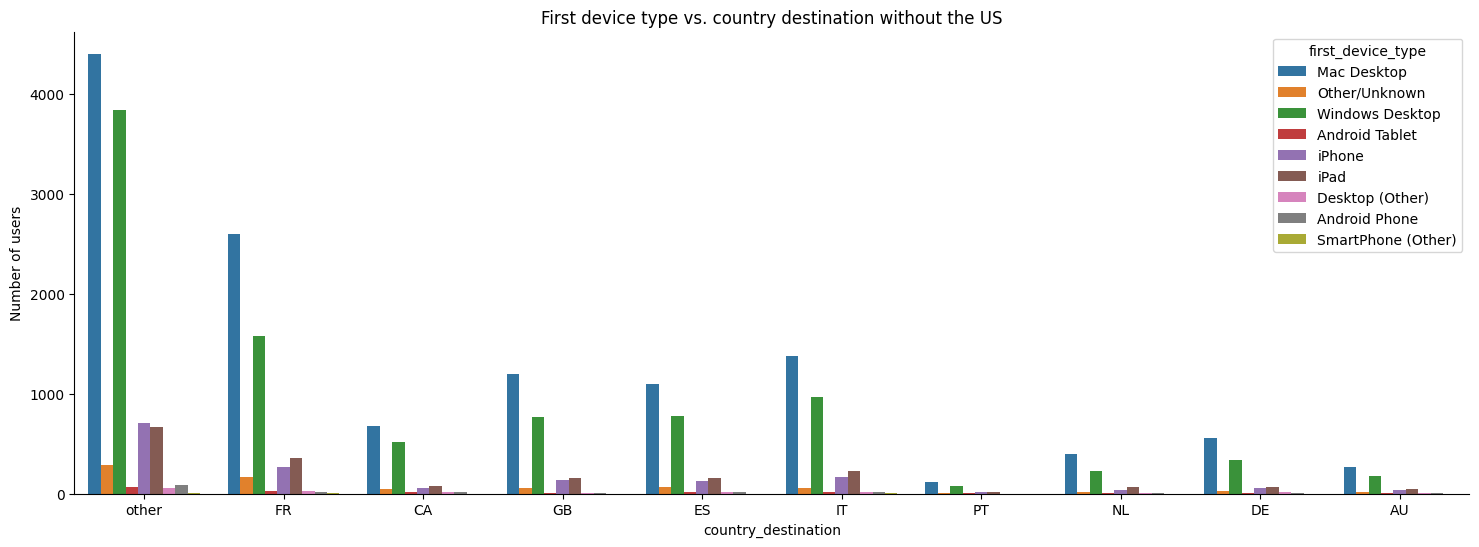

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=df_without_NDF_US, hue='first_device_type')
plt.ylabel('Number of users')
plt.title('First device type vs. country destination without the US')
sns.despine()

However, outside of the US, Windows descktop is far more common, in particular, there was little usage difference between Mac desktop and Windows desktop in Canada and Australia.

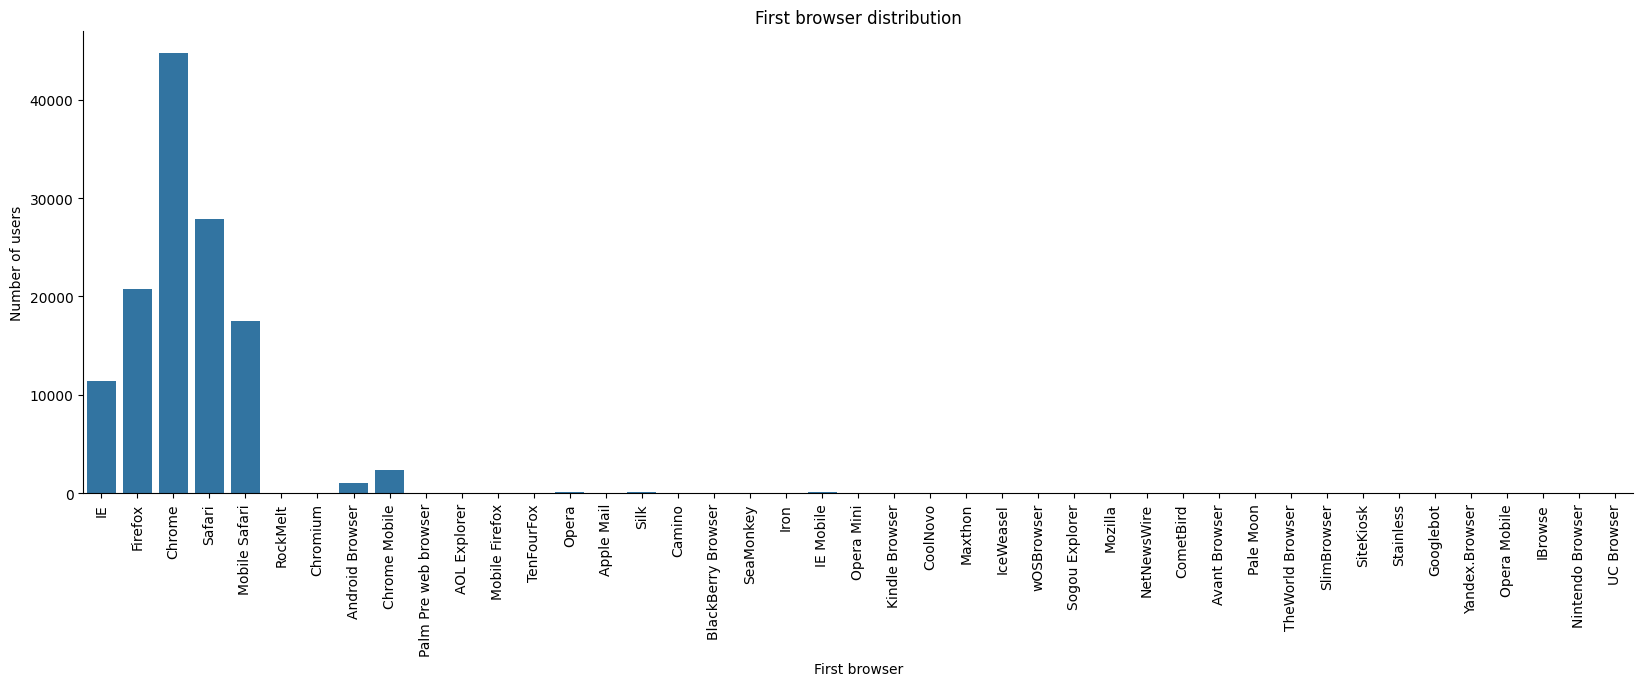

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='first_browser', data=df_without_NDF)
plt.xlabel('First browser')
plt.ylabel('Number of users')
plt.title('First browser distribution')
plt.xticks(rotation=90)
sns.despine()

Almost 30% of bookers in the data used Chrome browser.



# User's Prefferred Language

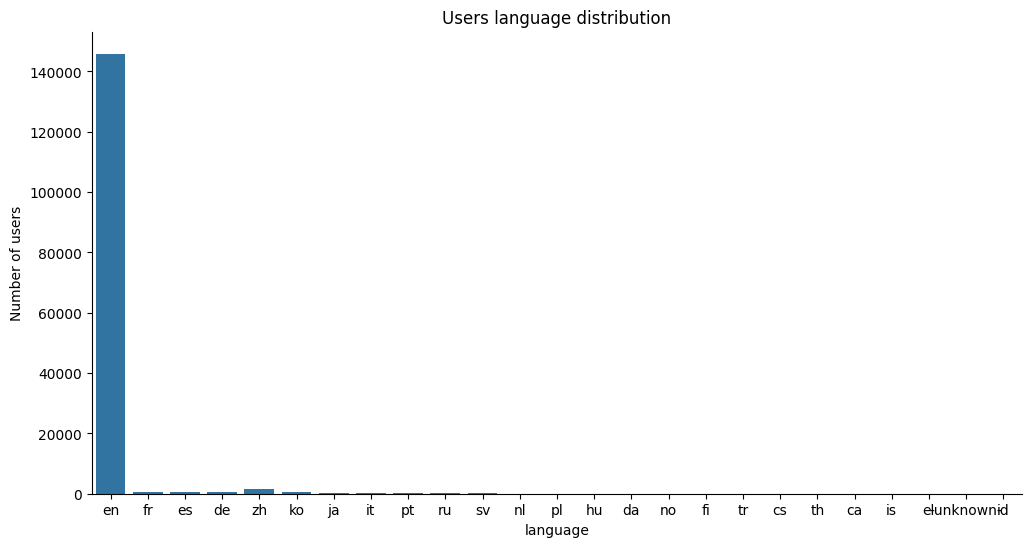

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='language', data=df_without_NDF)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('Users language distribution')
sns.despine()

Vast majority of the bookers' language preference is English, there is no surprise given most of the users in the data set are from the US.



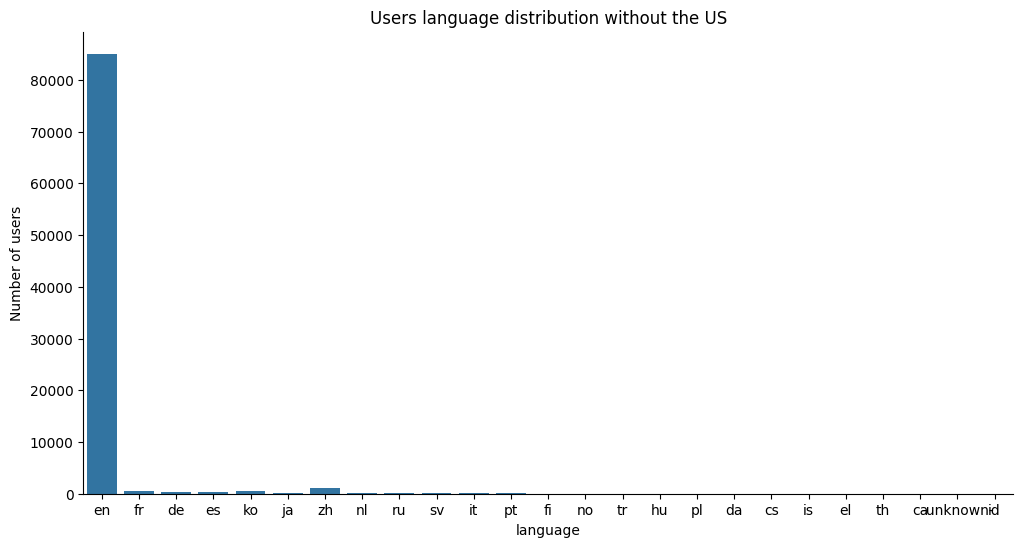

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='language', data=df_without_NDF_US)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('Users language distribution without the US')
sns.despine()

Without the US, English is still the most preferred langauge, interestingly, Chinese is the 2nd most preferred languages for bookers.



# Dates

In [ ]:
df_without_NDF['date_account_created'] = pd.to_datetime(df_without_NDF['date_account_created'])
df_without_NDF['timestamp_first_active'] = pd.to_datetime((df_without_NDF.timestamp_first_active // 1000000), format='%Y%m%d')
# df_without_NDF['date_account_created_day'] = df_without_NDF.date_account_created.dt.weekday_name
# df_without_NDF['date_account_created_month'] = df_without_NDF.date_account_created.dt.month
# df_without_NDF['date_account_created_year'] = df_without_NDF.date_account_created.dt.year

C:\Users\ralma\AppData\Local\Temp\ipykernel_8448\3979705309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_NDF['date_account_created'] = pd.to_datetime(df_without_NDF['date_account_created'])
C:\Users\ralma\AppData\Local\Temp\ipykernel_8448\3979705309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_NDF['timestamp_first_active'] = pd.to_datetime((df_without_NDF.timestamp_first_active // 1000000), format='%Y%m%d')


In [ ]:
df_without_NDF.head()


id date_account_created timestamp_first_active  gender   age  \
2  4ft3gnwmtx           2010-09-28             2009-06-09  FEMALE  56.0   
3  bjjt8pjhuk           2011-12-05             2009-10-31  FEMALE  42.0   
4  87mebub9p4           2010-09-14             2009-12-08       M  41.0   
5  osr2jwljor           2010-01-01             2010-01-01       M   NaN   
6  lsw9q7uk0j           2010-01-02             2010-01-02  FEMALE  46.0   

  signup_method  signup_flow language affiliate_channel affiliate_provider  \
2         basic            3       en            direct             direct   
3      facebook            0       en            direct             direct   
4         basic            0       en            direct             direct   
5         basic            0       en             other              other   
6         basic            0       en             other         craigslist   

  first_affiliate_tracked signup_app first_device_type first_browser  \
2               untracked        Web   Windows Desktop            IE   
3               untracked        Web       Mac Desktop       Firefox   
4               untracked        Web       Mac Desktop        Chrome   
5                     omg        Web       Mac Desktop        Chrome   
6               untracked        Web       Mac Desktop        Safari   

  country_destination  
2                  US  
3               other  
4                  US  
5                  US  
6                  US

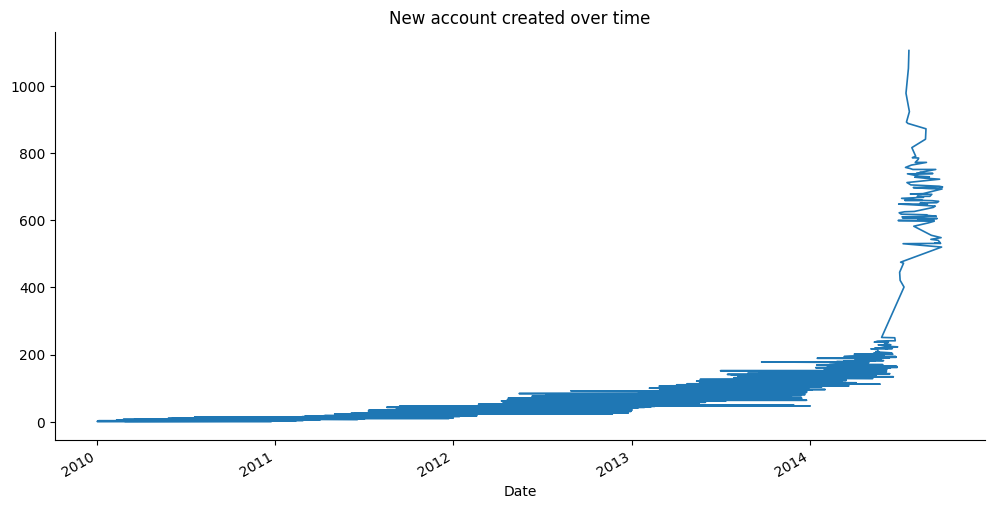

In [ ]:
plt.figure(figsize=(12,6))
df_without_NDF.date_account_created.value_counts().plot(kind='line', linewidth=1.2)
plt.xlabel('Date')
plt.title('New account created over time')
sns.despine()

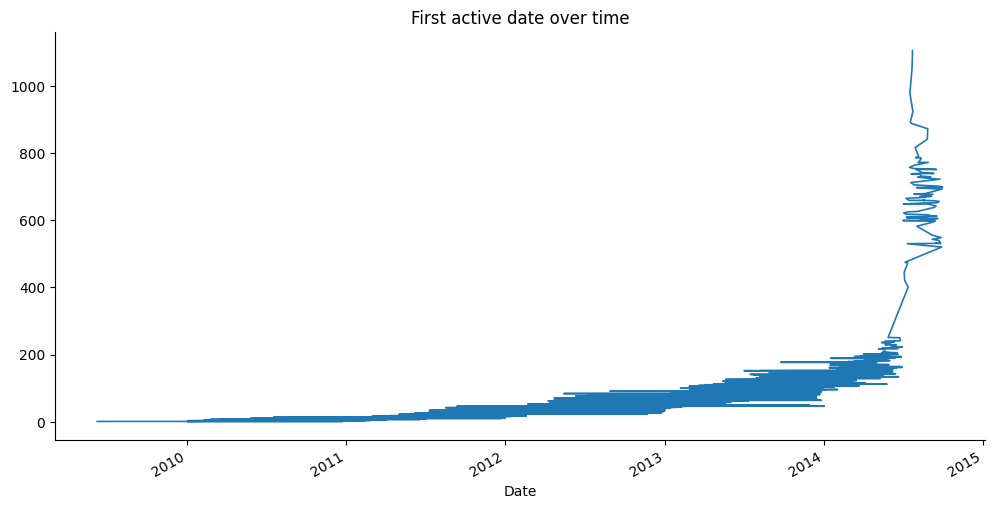

In [ ]:
plt.figure(figsize=(12,6))
df_without_NDF.timestamp_first_active.value_counts().plot(kind='line', linewidth=1.2)
plt.xlabel('Date')
plt.title('First active date over time')
sns.despine()

The pattern looks similar between date account created and date first active, as it shoule be. From these two plots, we can see how fast Airbnb has grown in the past a few years.

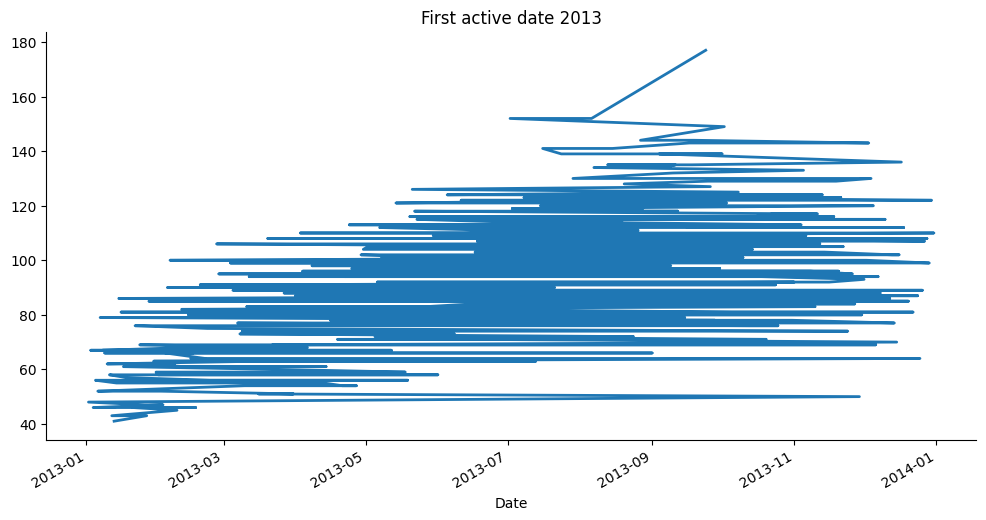

In [ ]:
df_2013 = df_without_NDF[df_without_NDF['timestamp_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
df_2013 = df_2013[df_2013['timestamp_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
plt.figure(figsize=(12,6))
df_2013.timestamp_first_active.value_counts().plot(kind='line', linewidth=2)
plt.xlabel('Date')
plt.title('First active date 2013')
sns.despine()

When dive into 2013, we see that there were several peak months for Airbnb users such as July, August and October, and December is the least active month for Airbnb users. In addition, it follows a similar pattern, such as peaks and off-peaks at the similar distance.

# User Session Exploration

In [ ]:
sessions = pd.read_csv('../data/sessions.csv')

print("There were", len(sessions.user_id.unique()), " unique user IDs in the session data.")

There were 135484  unique user IDs in the session data.


There are not many features in sessions data set, we can explore them one by one.



In [ ]:
sessions.isnull().sum()


user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [ ]:
sessions.head()


user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed  
0  Windows Desktop         319.0  
1  Windows Desktop       67753.0  
2  Windows Desktop         301.0  
3  Windows Desktop       22141.0  
4  Windows Desktop         435.0

# Action Type

In [ ]:
sessions.action_type.unique()


array([nan, 'click', 'data', 'view', 'submit', 'message_post',
       '-unknown-', 'booking_request', 'partner_callback',
       'booking_response', 'modify'], dtype=object)

We have "NaN" and "unknown" in the action type. So we will change "unknown" to "NaN".



In [ ]:
sessions['action_type'] = sessions['action_type'].replace('-unknown-', np.nan)


In [ ]:
sessions.action_type.value_counts()


action_type
view                3560902
data                2103770
click               1996183
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: count, dtype: int64

# Action

In [ ]:
sessions.action.value_counts().head(10)


action
show                     2768278
index                     843699
search_results            725226
personalize               706824
search                    536057
ajax_refresh_subtotal     487744
update                    365130
similar_listings          364624
social_connections        339000
reviews                   320591
Name: count, dtype: int64

# Action detail


In [ ]:
sessions.action_detail.value_counts().head(10)


action_detail
view_search_results            1776885
p3                             1376550
-unknown-                      1031141
wishlist_content_update         706824
user_profile                    656839
change_trip_characteristics     487744
similar_listings                364624
user_social_connections         336799
update_listing                  269779
listing_reviews                 269021
Name: count, dtype: int64

# Device type


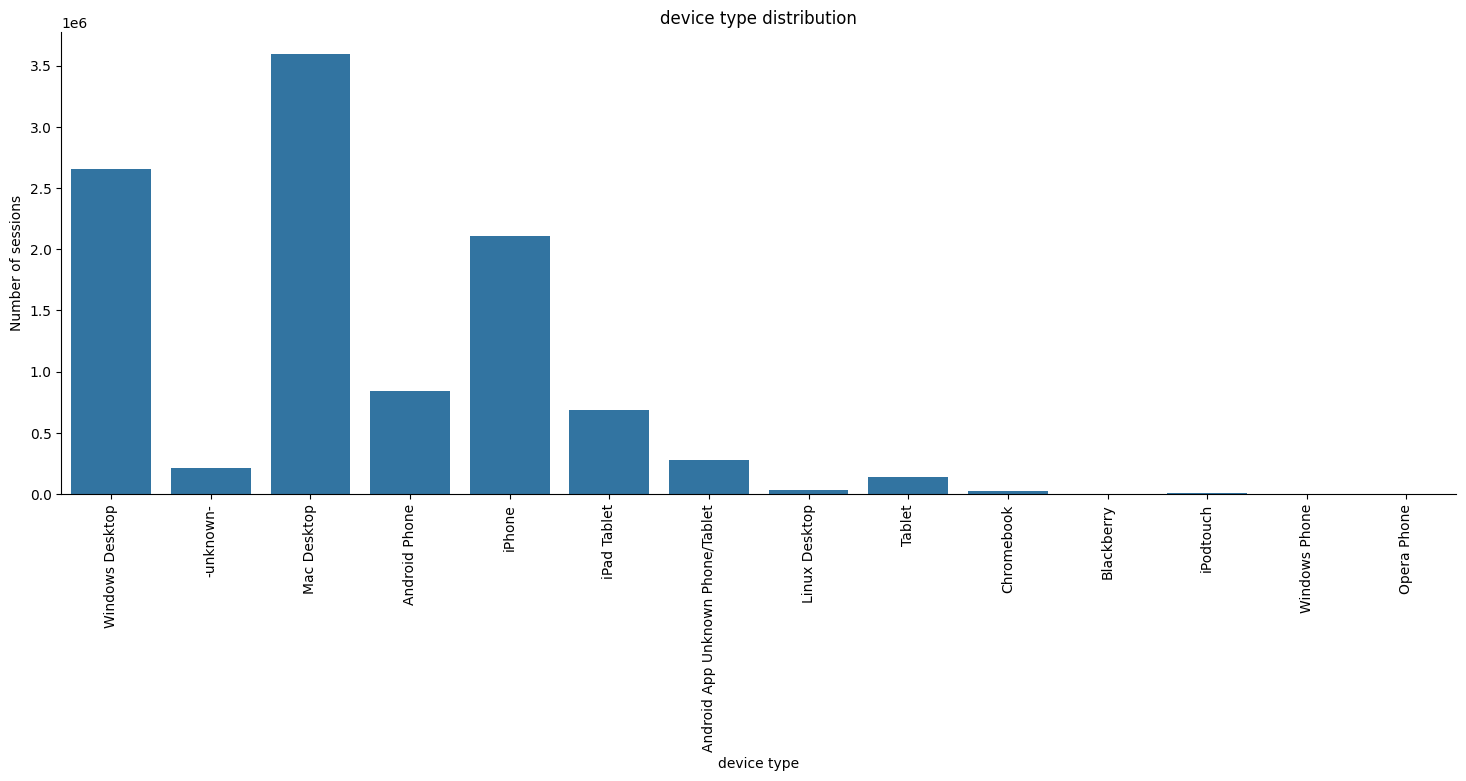

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='device_type', data=sessions)
plt.xlabel('device type')
plt.ylabel('Number of sessions')
plt.title('device type distribution')
plt.xticks(rotation=90)
sns.despine()

This affirms the previous discovery about users. The most common device type among Airbnb users are Apple products.



# Sessions of Users who had made bookings


From the previous analysis, we know which users had made bookings through Airbnb, so we want to explore these bookers session data. Are they different with non-bookers?

In [ ]:
df_without_NDF.head()


id date_account_created timestamp_first_active  gender   age  \
2  4ft3gnwmtx           2010-09-28             2009-06-09  FEMALE  56.0   
3  bjjt8pjhuk           2011-12-05             2009-10-31  FEMALE  42.0   
4  87mebub9p4           2010-09-14             2009-12-08       M  41.0   
5  osr2jwljor           2010-01-01             2010-01-01       M   NaN   
6  lsw9q7uk0j           2010-01-02             2010-01-02  FEMALE  46.0   

  signup_method  signup_flow language affiliate_channel affiliate_provider  \
2         basic            3       en            direct             direct   
3      facebook            0       en            direct             direct   
4         basic            0       en            direct             direct   
5         basic            0       en             other              other   
6         basic            0       en             other         craigslist   

  first_affiliate_tracked signup_app first_device_type first_browser  \
2               untracked        Web   Windows Desktop            IE   
3               untracked        Web       Mac Desktop       Firefox   
4               untracked        Web       Mac Desktop        Chrome   
5                     omg        Web       Mac Desktop        Chrome   
6               untracked        Web       Mac Desktop        Safari   

  country_destination  
2                  US  
3               other  
4                  US  
5                  US  
6                  US

In [ ]:
sessions.head()


user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed  
0  Windows Desktop         319.0  
1  Windows Desktop       67753.0  
2  Windows Desktop         301.0  
3  Windows Desktop       22141.0  
4  Windows Desktop         435.0

In [ ]:
# ✅ aggregate sessions first, then merge (much smaller)
session_summary = (
    sessions
    .groupby("user_id")["action_type"]
    .value_counts()
    .unstack(fill_value=0)        # pivot so each action_type is a column
    .reset_index()                # keep user_id as a column
)

booker_session = pd.merge(
    df_without_NDF,
    session_summary,
    how="left",
    left_on="id",
    right_on="user_id"
).drop(columns=["user_id"])


# Bookers action type

In [ ]:
sessions["action_type"].value_counts()


action_type
view                3560902
data                2103770
click               1996183
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: count, dtype: int64

In [ ]:
sessions["action"].value_counts().head(10)


action
show                     2768278
index                     843699
search_results            725226
personalize               706824
search                    536057
ajax_refresh_subtotal     487744
update                    365130
similar_listings          364624
social_connections        339000
reviews                   320591
Name: count, dtype: int64

Unfortunately, there was no significant difference in actions between bookers and all users.



# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_users = pd.read_csv('../data/train_users_2.csv')
test_users = pd.read_csv('../data/test_users.csv')
df = pd.concat((train_users, test_users), axis=0, ignore_index=True)
df.drop('date_first_booking', axis=1, inplace=True)

# Date time features

Cast date time column to property date time format, Split dates into day, week, month, year, Get the difference(time lag) between the date in which the account was created and when it was first active.

In [ ]:
df['date_account_created'] = pd.to_datetime(df['date_account_created'])

# let pandas infer the format (handles both YYYYMMDDHHMMSS and YYYY-MM-DD)
df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active'], errors='coerce')

# Extract features
df['weekday_account_created'] = df.date_account_created.dt.day_name()
df['day_account_created'] = df.date_account_created.dt.day
df['month_account_created'] = df.date_account_created.dt.month
df['year_account_created'] = df.date_account_created.dt.year

df['weekday_first_active'] = df.timestamp_first_active.dt.day_name()
df['day_first_active'] = df.timestamp_first_active.dt.day
df['month_first_active'] = df.timestamp_first_active.dt.month
df['year_first_active'] = df.timestamp_first_active.dt.year

# Time lag in days
df['time_lag'] = (df['date_account_created'] - df['timestamp_first_active']).dt.days

# Drop raw datetime columns if not needed
df.drop(['date_account_created', 'timestamp_first_active'], axis=1, inplace=True)


In [ ]:
df.columns


Index(['id', 'gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'weekday_account_created', 'day_account_created',
       'month_account_created', 'year_account_created', 'weekday_first_active',
       'day_first_active', 'month_first_active', 'year_first_active',
       'time_lag'],
      dtype='object')

# Age features

Convert year to age, set limits to age, and fill NaNs with -1.



In [ ]:
df_with_year = df['age'] > 1000
df.loc[df_with_year, 'age'] = 2015 - df.loc[df_with_year, 'age']
df.loc[df['age'] > 95, 'age'] = np.nan
df.loc[df['age'] < 16, 'age'] = np.nan

# ✅ safer way without inplace
df['age'] = df['age'].fillna(-1)


# User session action features


Group by user_id, count the number of times an action, action type and action detail is made by each user. Doing groupby.agg(len) is roughly twice as fast as groupby.size(). Therefore, I am using groupby.agg(len). For device type, we group by user_id, sum up total secs_elapses for each user. Finally, we add a new column named "most_used_device" for each user most used device.

In [ ]:
sessions = pd.read_csv("../data/sessions.csv")
sessions.rename(columns={'user_id': 'id'}, inplace=True)

# counts
action_count = sessions.pivot_table(index="id", columns="action", values="secs_elapsed", aggfunc="count")
action_type_count = sessions.pivot_table(index="id", columns="action_type", values="secs_elapsed", aggfunc="count")
action_detail_count = sessions.pivot_table(index="id", columns="action_detail", values="secs_elapsed", aggfunc="count")

# sum of secs_elapsed
device_type_sum = sessions.pivot_table(index="id", columns="device_type", values="secs_elapsed", aggfunc="sum")

# join everything
sessions_data = pd.concat([action_count, action_type_count, action_detail_count, device_type_sum], axis=1)

# clean column names
sessions_data.columns = [f"{c}_count" for c in sessions_data.columns]

# most used device per user (use mode, not max → max gives lexicographic order)
sessions_data["most_used_device"] = sessions.groupby("id")["device_type"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)


<Axes: >

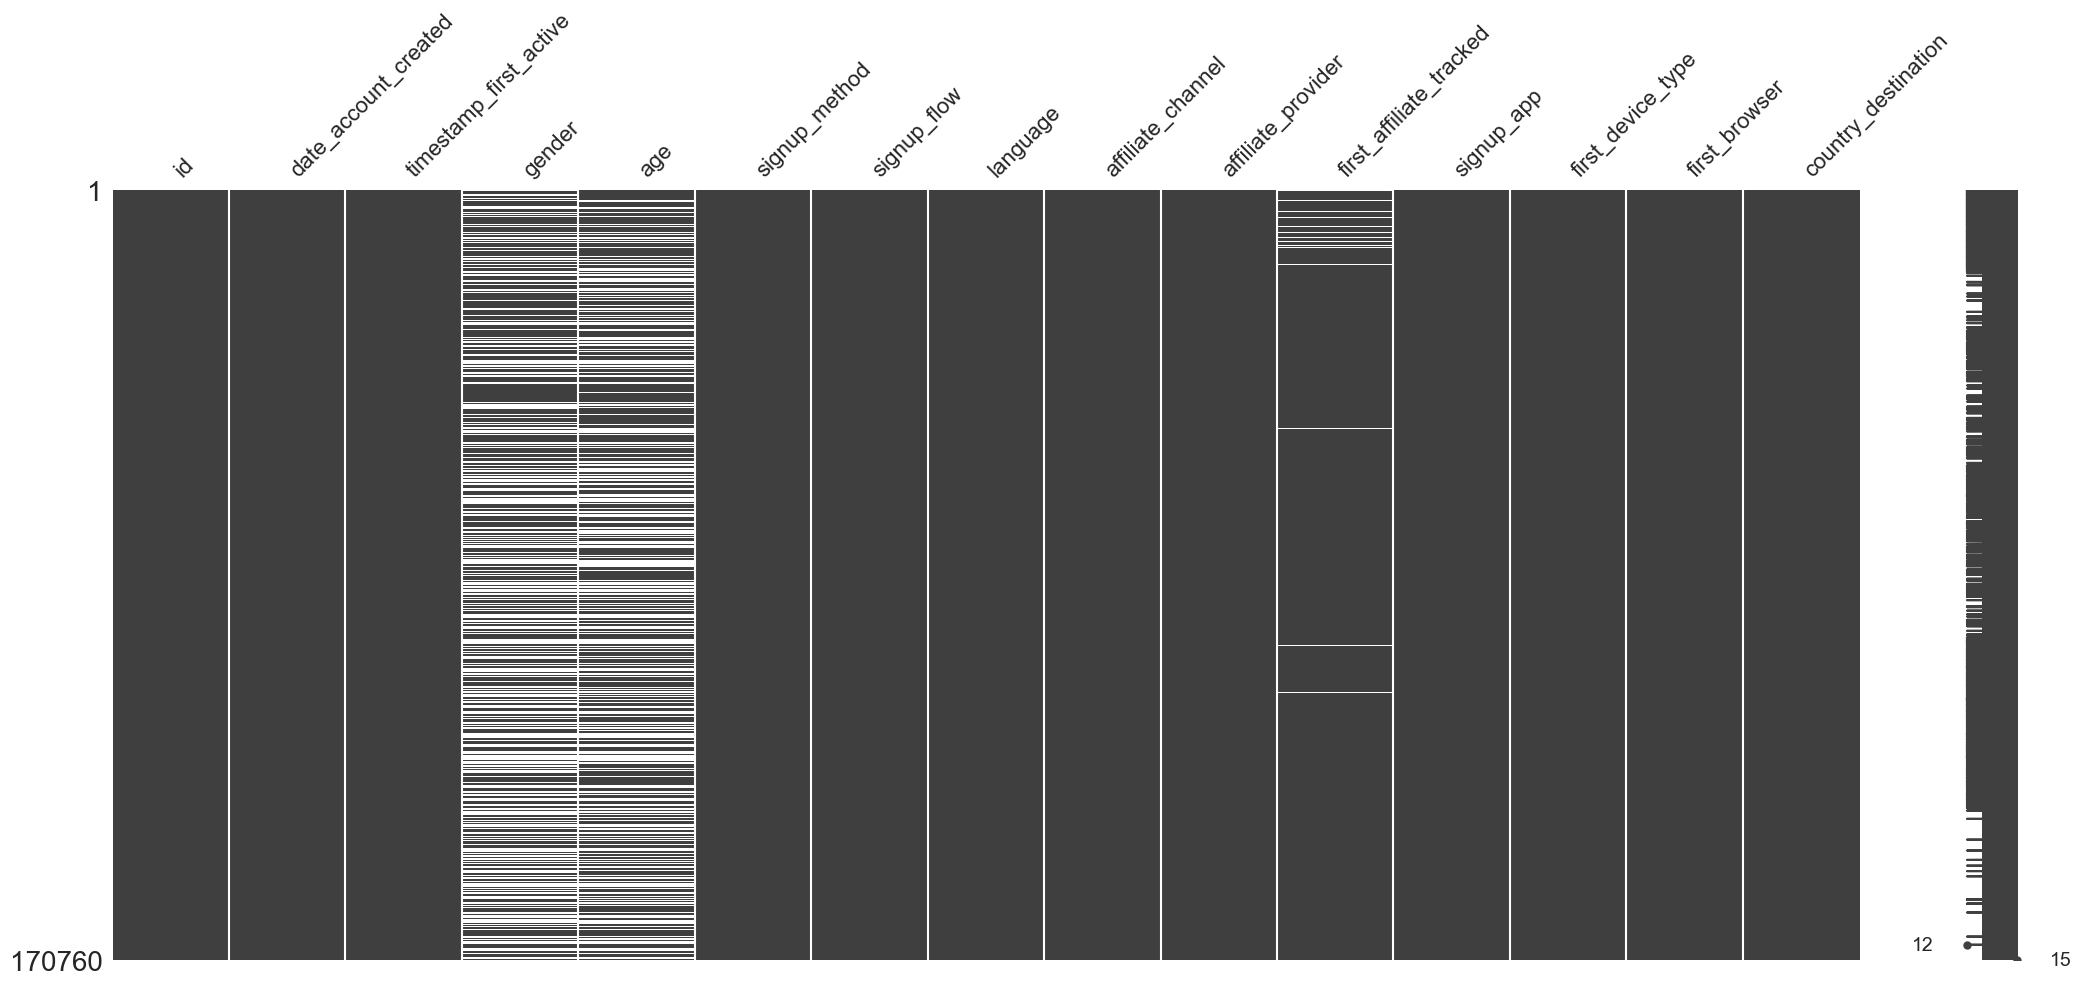

In [60]:
import missingno as msno
msno.matrix(data_train)

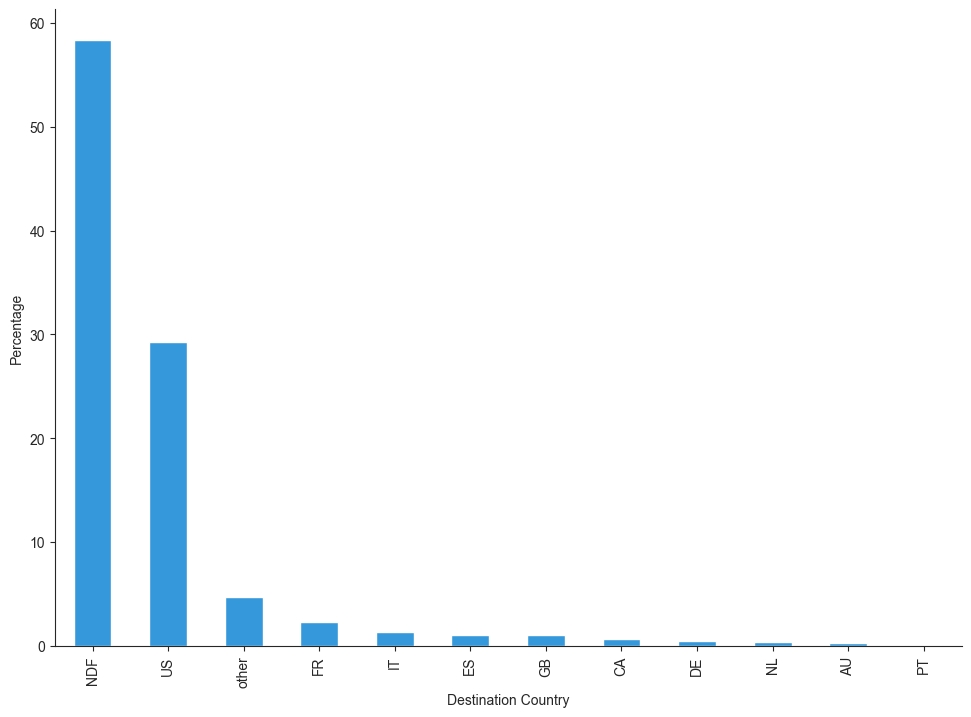

In [61]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = data_train.country_destination.value_counts() / data_train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

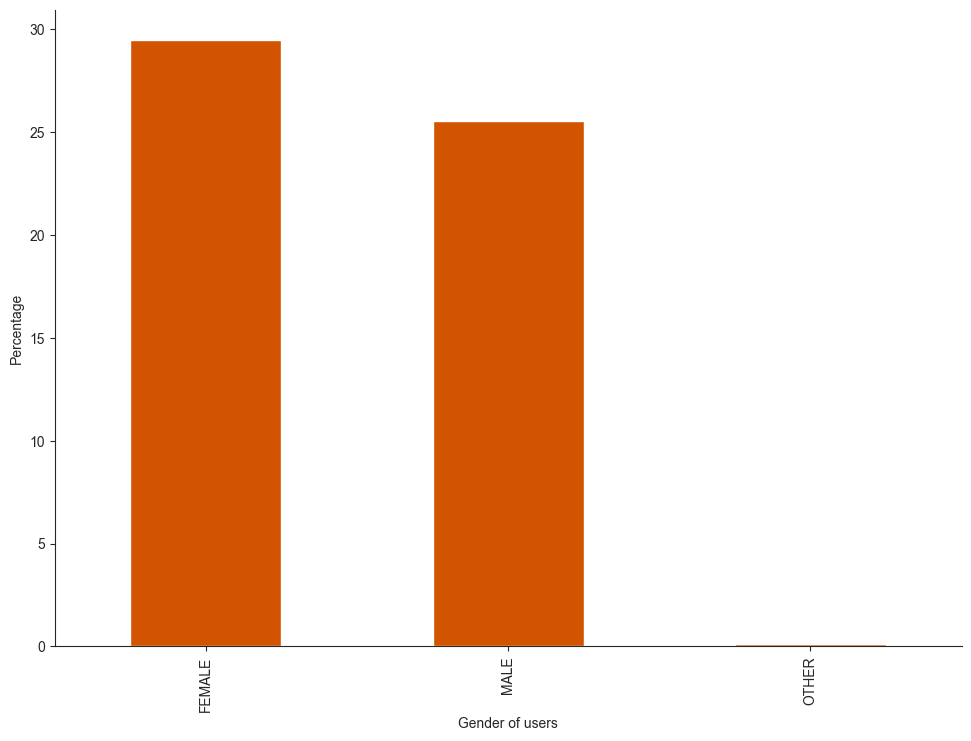

In [62]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
gender_percentage = data_train.gender.value_counts() / data_train.shape[0] * 100
gender_percentage.plot(kind='bar',color='#D35400')
plt.xlabel('Gender of users')
plt.ylabel('Percentage')
sns.despine()

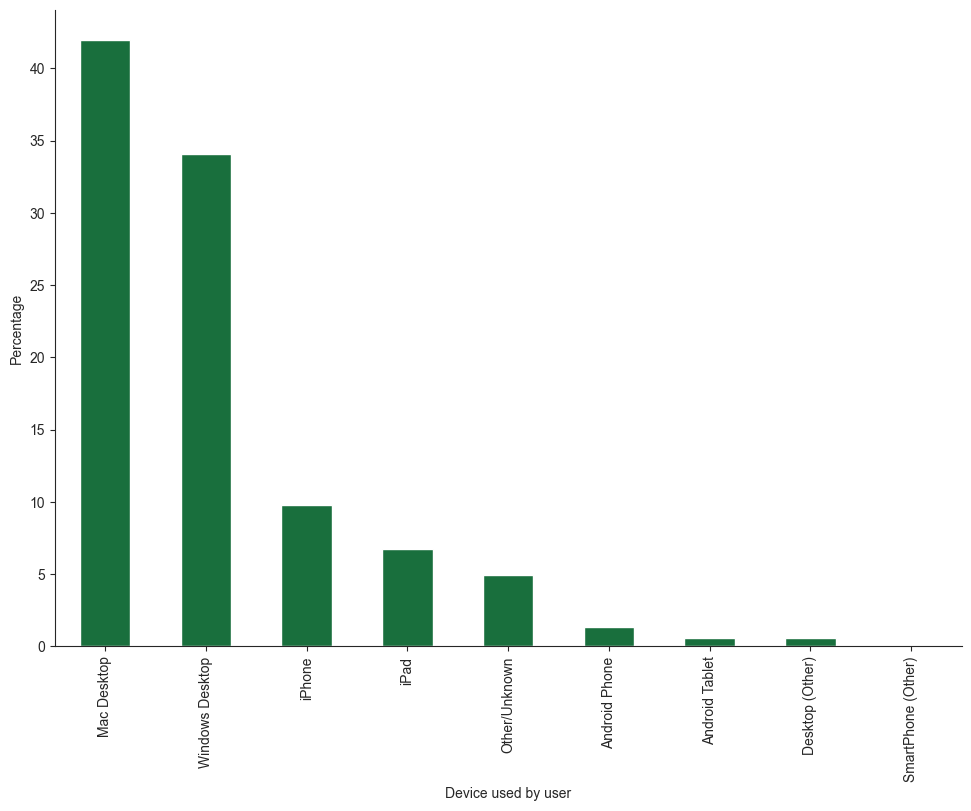

In [63]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device_percentage = data_train.first_device_type.value_counts() / data_train.shape[0] * 100
device_percentage.plot(kind='bar',color='#196F3D')
plt.xlabel('Device used by user')
plt.ylabel('Percentage')
sns.despine()

C:\Users\ralma\AppData\Local\Temp\ipykernel_25460\2101552303.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train.age.dropna(), color='#16A085')


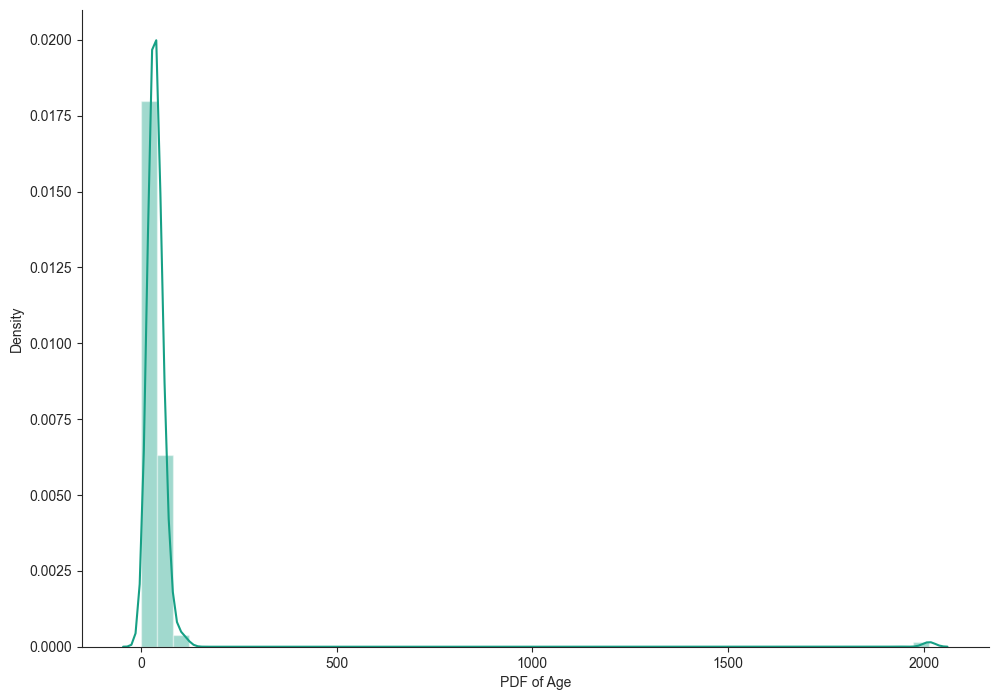

In [64]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(data_train.age.dropna(), color='#16A085')
plt.xlabel('PDF of Age')
sns.despine()


# new version : 


# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(11.7, 8.27)

# sns.histplot(
#     data_train.age.dropna(),
#     bins=30,        # adjust for smoothness
#     kde=True,       # adds the density curve
#     stat="density", # match PDF style of distplot
#     color='#16A085',
#     ax=ax
# )

# plt.xlabel('PDF of Age')
# sns.despine()


C:\Users\ralma\AppData\Local\Temp\ipykernel_25460\2459019270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train.age.dropna(), color='#16A085')


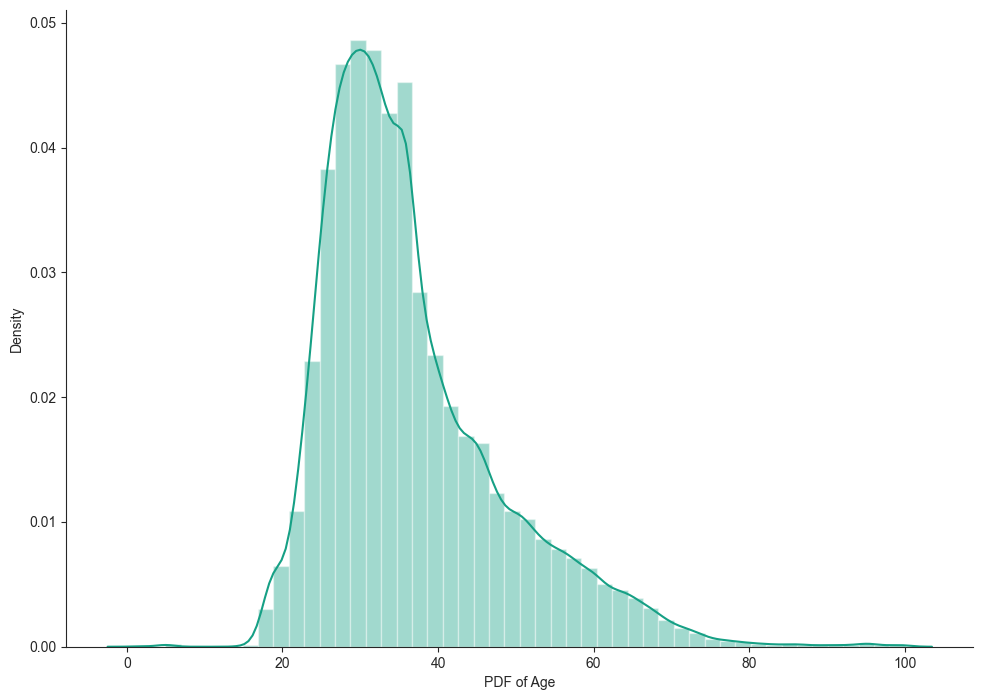

In [65]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_train['age']=data_train['age'].apply(lambda x : 36 if x>100 else x)
sns.distplot(data_train.age.dropna(), color='#16A085')
plt.xlabel('PDF of Age')
sns.despine()

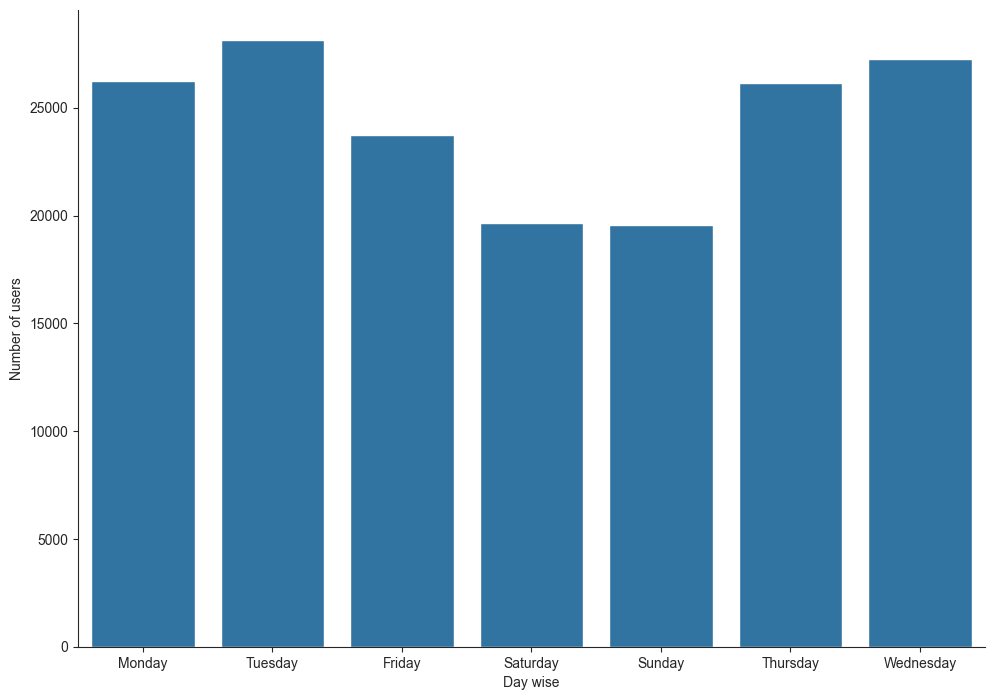

In [66]:
data_train['date_account_created_new'] = pd.to_datetime(data_train['date_account_created'])
data_train['date_first_active_new'] = pd.to_datetime((data_train.timestamp_first_active // 1000000), format='%Y%m%d')

data_train['date_account_created_day']   = data_train.date_account_created_new.dt.day_name()
data_train['date_account_created_month'] = data_train.date_account_created_new.dt.month
data_train['date_account_created_year']  = data_train.date_account_created_new.dt.year

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

data_without_NDF  = data_train[data_train['country_destination']!='US']
data_without_NDF1 = data_without_NDF[data_without_NDF['country_destination']!='NDF']

sns.countplot(x='date_account_created_day', data=data_train)
plt.xlabel('Day wise')
plt.ylabel('Number of users')
sns.despine()


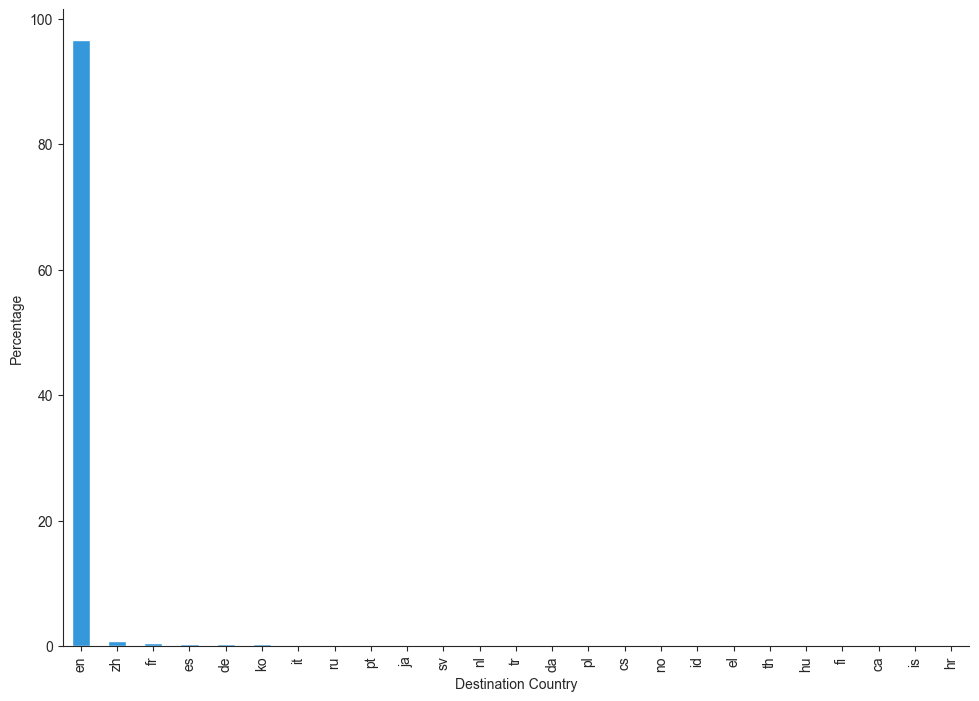

In [67]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = data_train.language.value_counts() / data_train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

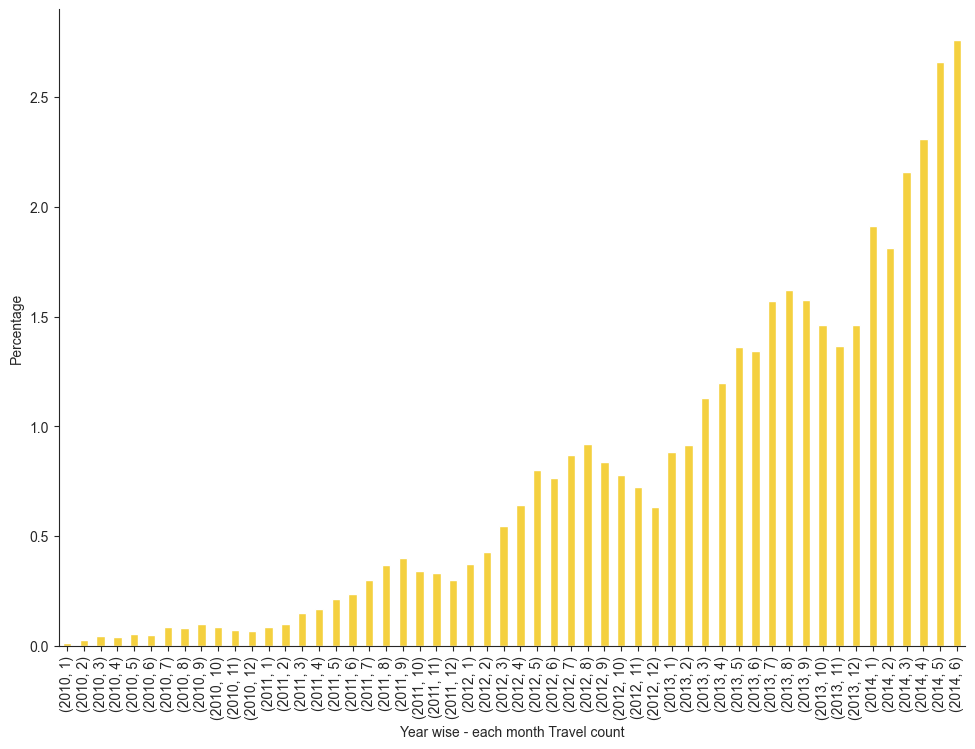

In [68]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = data_train[data_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
data_train['booked'] = data_train.country_destination.apply(lambda x:1 if x!='NDF' else 0 )
destination_percentage = data_train.groupby(['date_account_created_year','date_account_created_month']).booked.sum() / data_train.shape[0] * 100
destination_percentage.plot(kind='bar',color="#F4D03F")
plt.xlabel('Year wise - each month Travel count')
plt.ylabel('Percentage')
sns.despine()

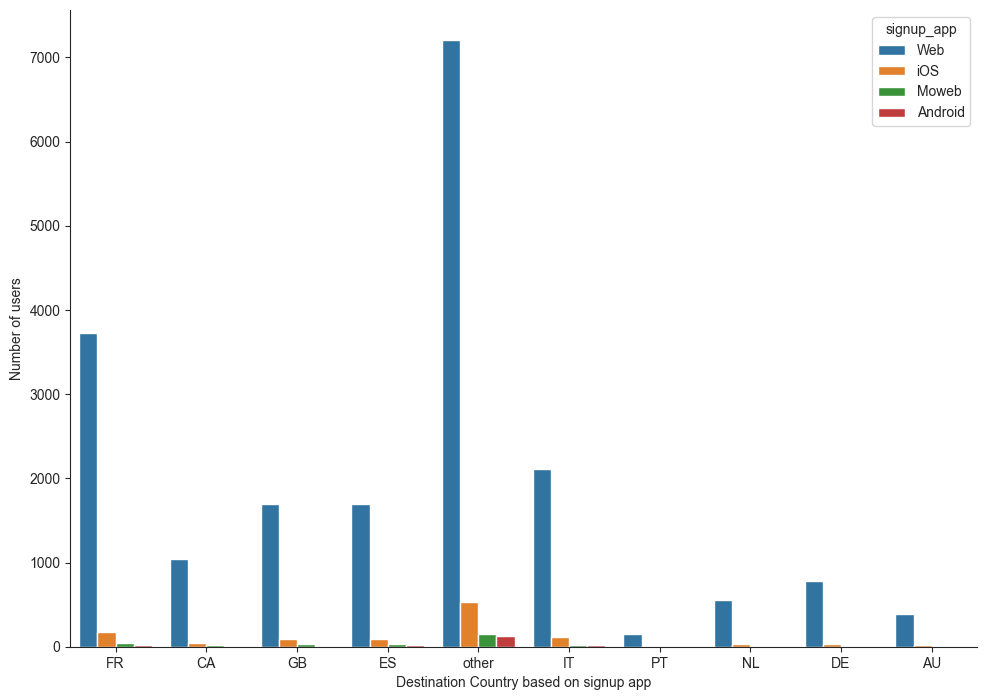

In [69]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = data_train[data_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_app',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup app')
plt.ylabel('Number of users')
sns.despine()

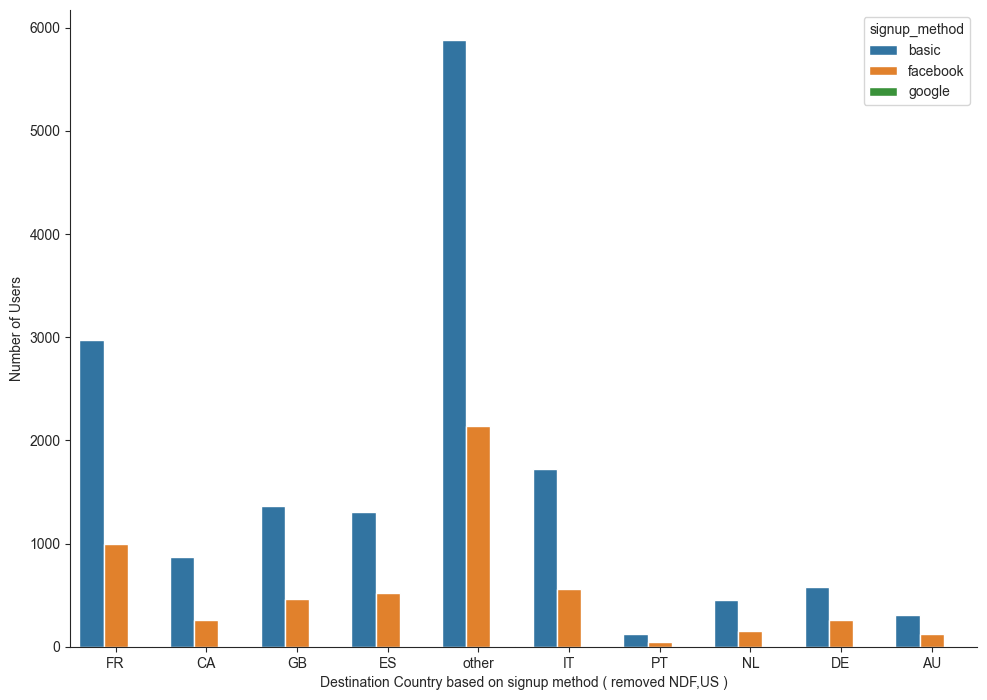

In [70]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = data_train[data_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_method',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup method ( removed NDF,US )')
plt.ylabel('Number of Users')
sns.despine()

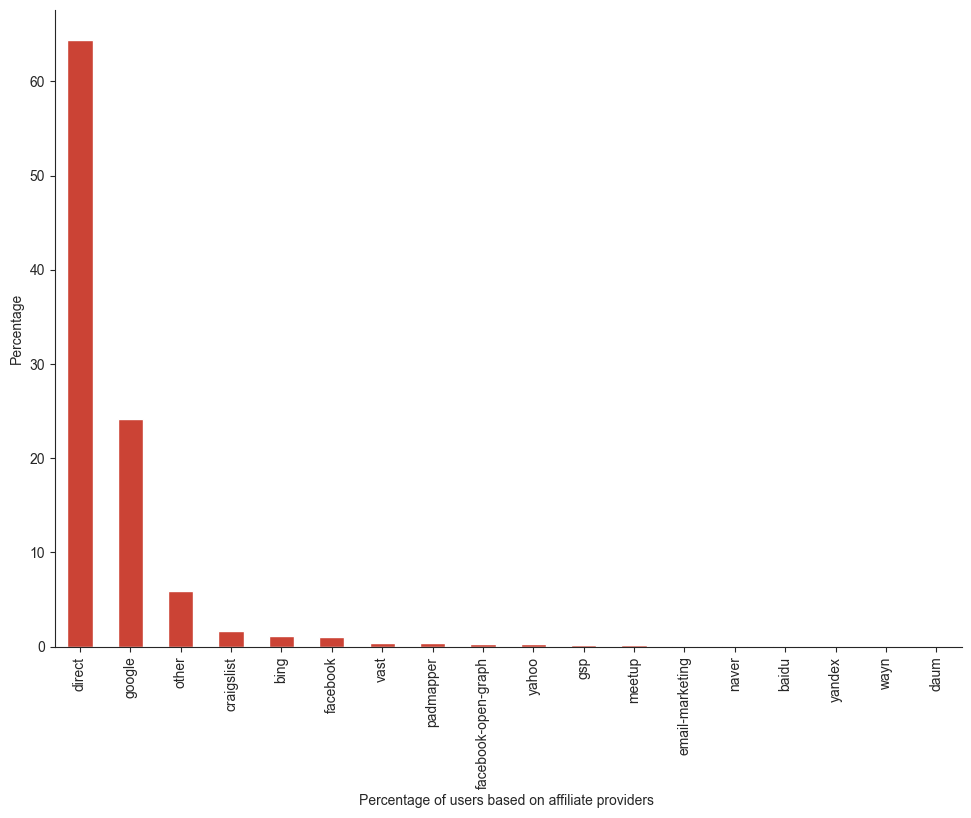

In [71]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
affiliate_provider_percentage = data_train.affiliate_provider.value_counts() / data_train.shape[0] * 100
affiliate_provider_percentage.plot(kind='bar',color='#CB4335')
plt.xlabel('Percentage of users based on affiliate providers ')
plt.ylabel('Percentage')
sns.despine()

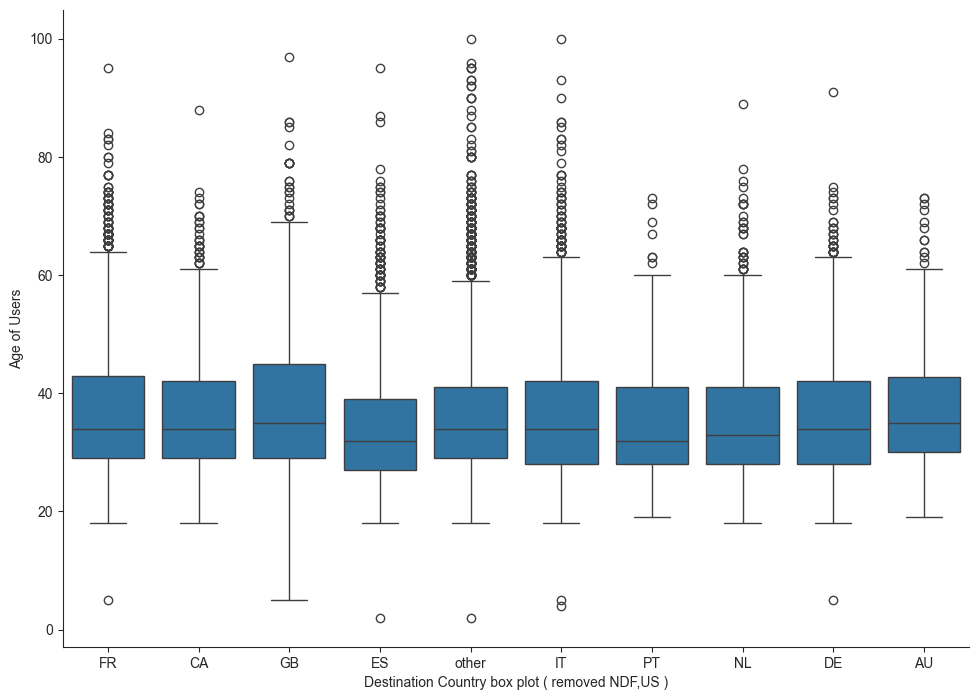

In [72]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = data_train[data_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.boxplot(y='age' , x='country_destination',data=data_without_NDF1)
plt.xlabel('Destination Country box plot ( removed NDF,US )')
plt.ylabel('Age of Users')
sns.despine()

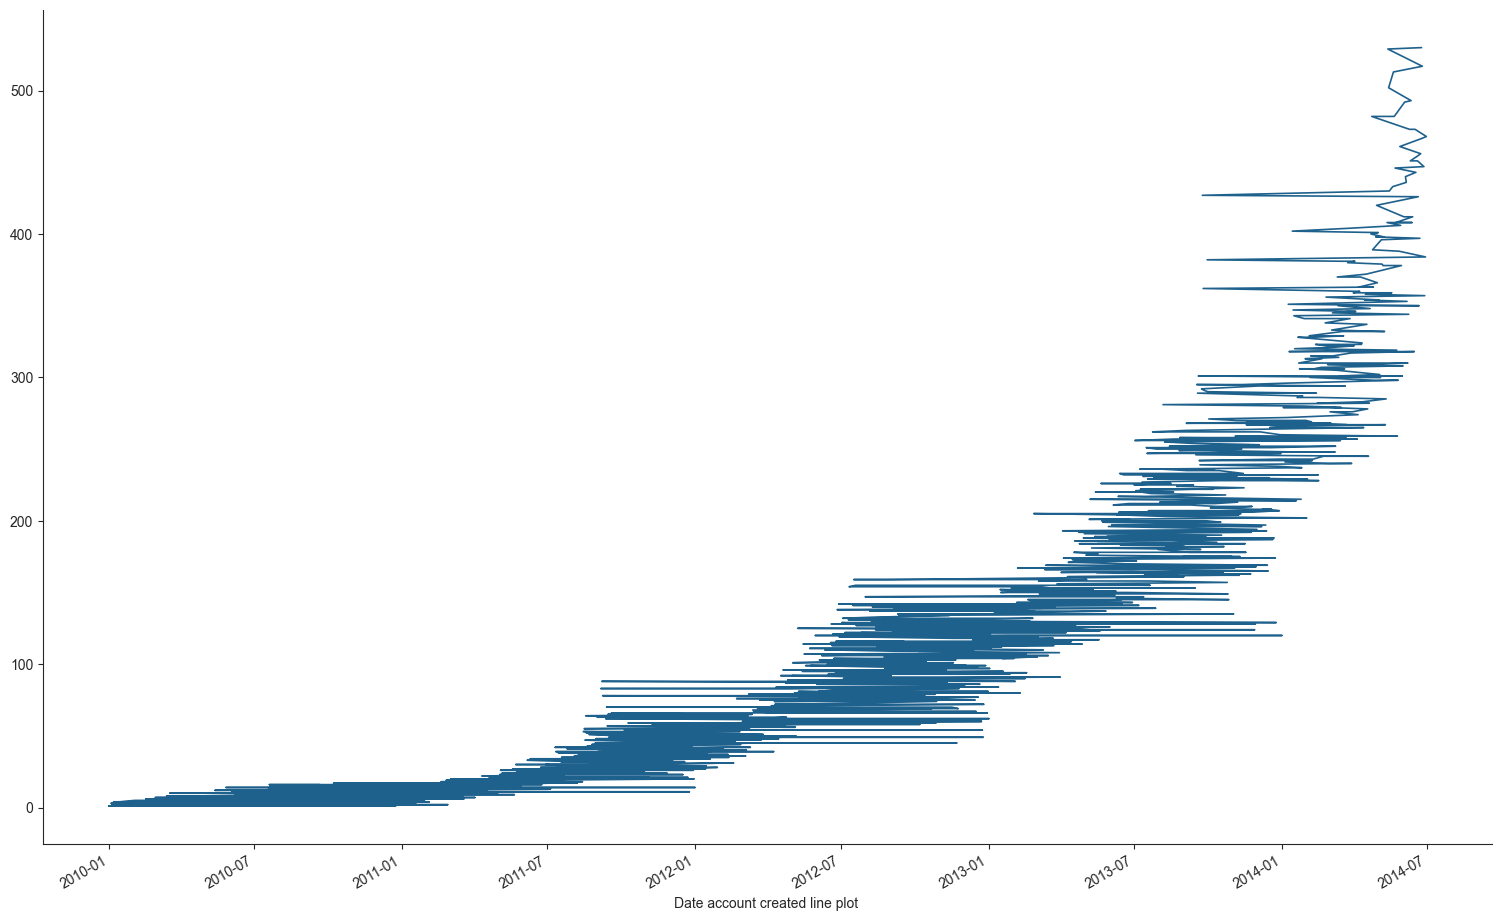

In [73]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 12.27)
data_train.date_account_created_new.value_counts().plot(kind='line', linewidth=1.2, color='#1F618D')
plt.xlabel('Date account created line plot ')
sns.despine()

In [74]:
from sklearn.preprocessing import LabelEncoder
df_all = data_train_copy
print(df_all.columns)
df_all = df_all.drop(['id', 'date_first_booking'], axis=1)
df_all = df_all.fillna(-1)
dac = np.vstack(df_all.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df_all['dac_year'] = dac[:,0]
df_all['dac_month'] = dac[:,1]
df_all['dac_day'] = dac[:,2]
df_all = df_all.drop(['date_account_created'], axis=1)
tfa = np.vstack(df_all.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
df_all['tfa_year'] = tfa[:,0]
df_all['tfa_month'] = tfa[:,1]
df_all['tfa_day'] = tfa[:,2]
df_all = df_all.drop(['timestamp_first_active'], axis=1)
av = df_all.age.values
df_all['age'] = np.where(np.logical_or(av<14, av>100), -1, av)
ohe_feats = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [75]:
df_all  = data_train_copy
piv_train = data_train.shape[0]
df_all = df_all.drop(['id', 'date_first_booking'], axis=1)
df_all = df_all.fillna(-1)
dac = np.vstack(df_all.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df_all['dac_year'] = dac[:,0]
df_all['dac_month'] = dac[:,1]
df_all['dac_day'] = dac[:,2]
df_all = df_all.drop(['date_account_created'], axis=1)

tfa = np.vstack(df_all.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
df_all['tfa_year'] = tfa[:,0]
df_all['tfa_month'] = tfa[:,1]
df_all['tfa_day'] = tfa[:,2]
df_all = df_all.drop(['timestamp_first_active'], axis=1)
av = df_all.age.values
df_all['age'] = np.where(np.logical_or(av<14, av>100), -1, av)

In [76]:
for f in ohe_feats:
    df_all_dummy = pd.get_dummies(df_all[f], prefix=f)
    df_all = df_all.drop([f], axis=1)
    df_all = pd.concat((df_all, df_all_dummy), axis=1)
vals = df_all.values
piv_train = df_all.shape[0]
X = vals[:piv_train]
le = LabelEncoder()
labels = df_all['country_destination'].values
df_all = df_all.drop(['country_destination'], axis=1)
y = le.fit_transform(labels)   
X_test = vals[piv_train:]
df_all

age  dac_year  dac_month  dac_day  tfa_year  tfa_month  tfa_day  \
27511   -1.0      2012          6       12      2012          6       12   
73025   42.0      2013          4       25      2013          4       25   
130340  -1.0      2013         12        6      2013         12        6   
13263   28.0      2011         11       30      2011         11       30   
84686   22.0      2013          6       18      2013          6       18   
...      ...       ...        ...      ...       ...        ...      ...   
76519   -1.0      2013          5       12      2013          5       12   
74286   -1.0      2013          5        1      2013          5        1   
32020   -1.0      2012          7       15      2012          7       15   
186964  26.0      2014          5       10      2014          5       10   
36299   40.0      2012          8       13      2012          8       13   

        gender_-unknown-  gender_FEMALE  gender_MALE  ...  \
27511               True          False        False  ...   
73025              False           True        False  ...   
130340              True          False        False  ...   
13263              False          False         True  ...   
84686               True          False        False  ...   
...                  ...            ...          ...  ...   
76519               True          False        False  ...   
74286               True          False        False  ...   
32020               True          False        False  ...   
186964             False           True        False  ...   
36299              False           True        False  ...   

        first_browser_SeaMonkey  first_browser_Silk  first_browser_SiteKiosk  \
27511                     False               False                    False   
73025                     False               False                    False   
130340                    False               False                    False   
13263                     False               False                    False   
84686                     False               False                    False   
...                         ...                 ...                      ...   
76519                     False               False                    False   
74286                     False               False                    False   
32020                     False               False                    False   
186964                    False               False                    False   
36299                     False               False                    False   

        first_browser_SlimBrowser  first_browser_Sogou Explorer  \
27511                       False                         False   
73025                       False                         False   
130340                      False                         False   
13263                       False                         False   
84686                       False                         False   
...                           ...                           ...   
76519                       False                         False   
74286                       False                         False   
32020                       False                         False   
186964                      False                         False   
36299                       False                         False   

        first_browser_Stainless  first_browser_TenFourFox  \
27511                     False                     False   
73025                     False                     False   
130340                    False                     False   
13263                     False                     False   
84686                     False                     False   
...                         ...                       ...   
76519                     False                     False   
74286                     False                     False   
32020                     False                 

In [77]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

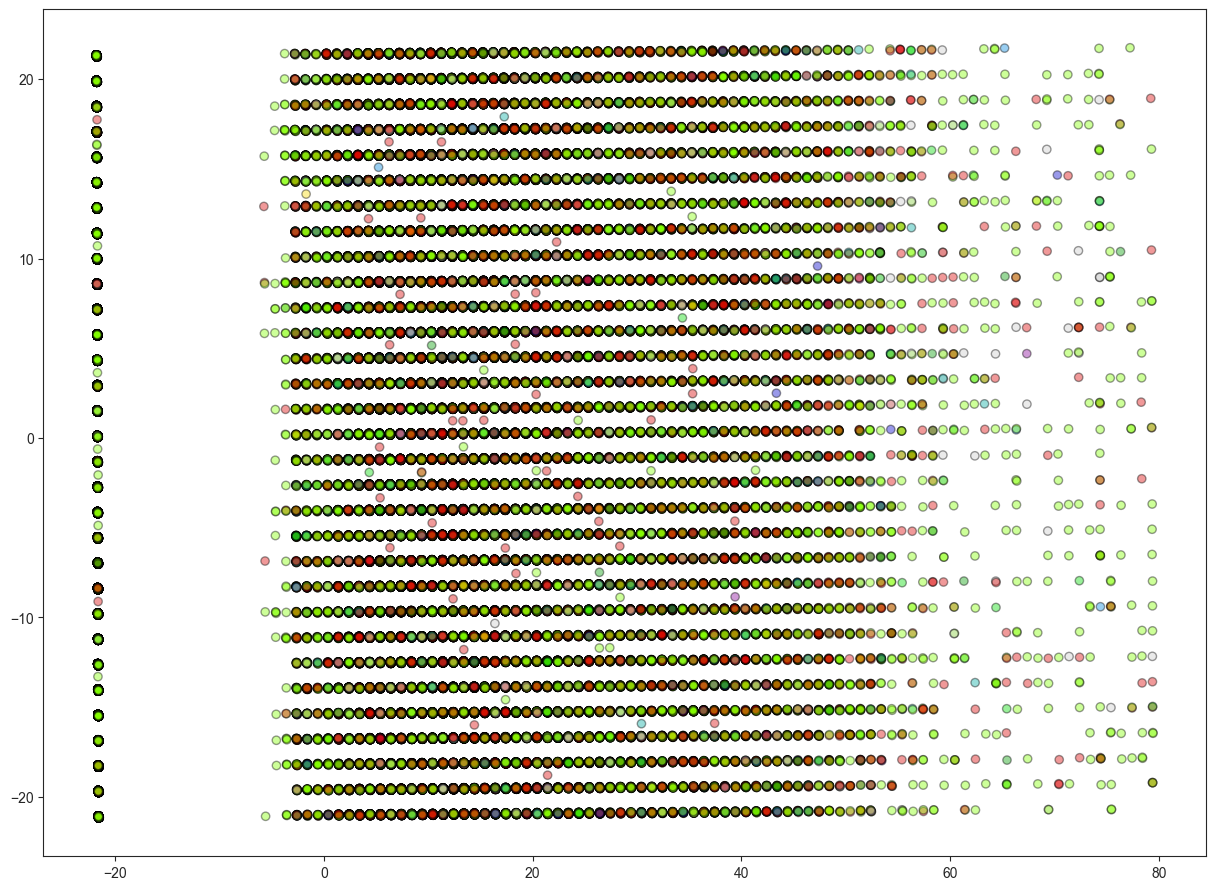

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = (15, 11)

X_pca = PCA().fit_transform(df_all)

plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    cmap=plt.cm.nipy_spectral,
    alpha=0.4,
    edgecolor='k'
)

plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 170760 samples in 0.132s...
[t-SNE] Computed neighbors for 170760 samples in 133.239s...
[t-SNE] Computed conditional probabilities for sample 1000 / 170760
[t-SNE] Computed conditional probabilities for sample 2000 / 170760
[t-SNE] Computed conditional probabilities for sample 3000 / 170760
[t-SNE] Computed conditional probabilities for sample 4000 / 170760
[t-SNE] Computed conditional probabilities for sample 5000 / 170760
[t-SNE] Computed conditional probabilities for sample 6000 / 170760
[t-SNE] Computed conditional probabilities for sample 7000 / 170760
[t-SNE] Computed conditional probabilities for sample 8000 / 170760
[t-SNE] Computed conditional probabilities for sample 9000 / 170760
[t-SNE] Computed conditional probabilities for sample 10000 / 170760
[t-SNE] Computed conditional probabilities for sample 11000 / 170760
[t-SNE] Computed conditional probabilities for sample 12000 / 170760
[t-SNE] Computed conditional proba

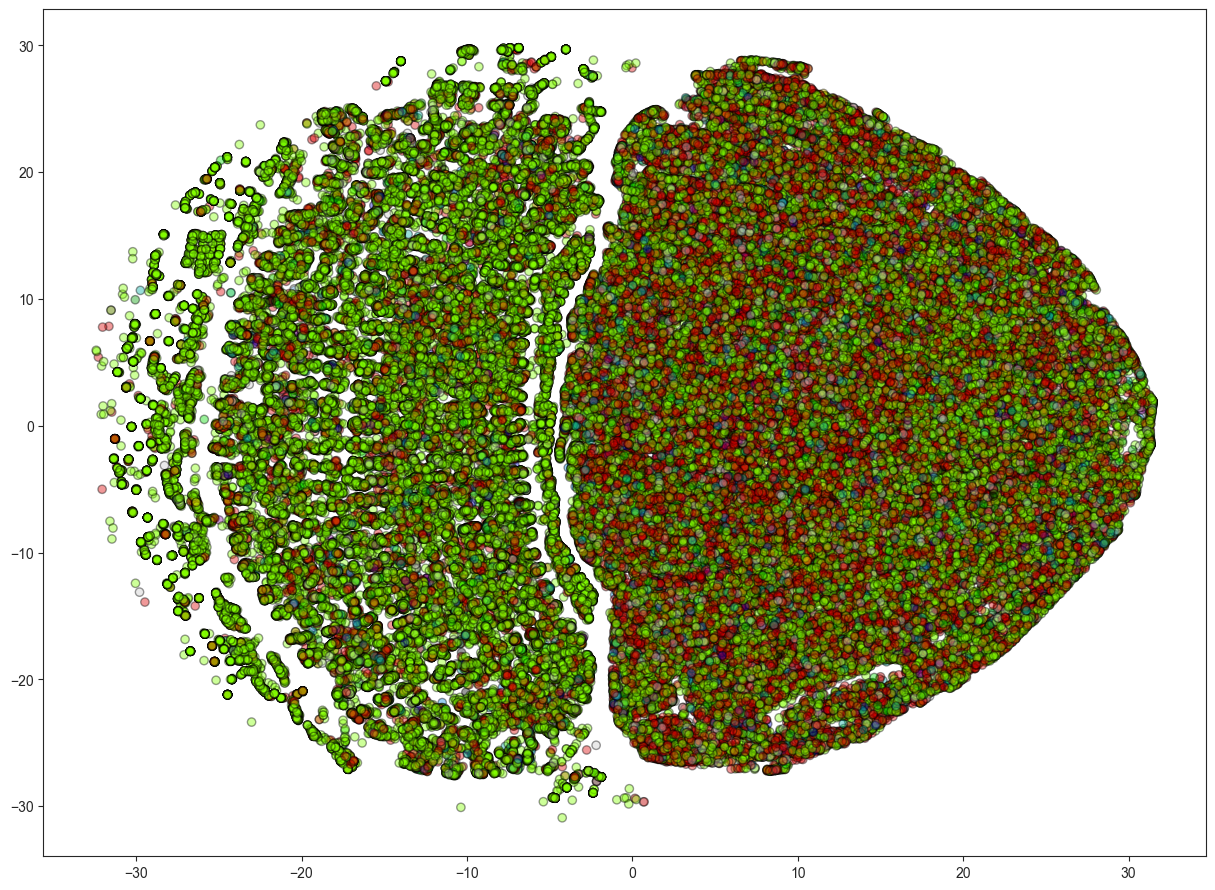

In [79]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 11)

X_tsne = TSNE(
    learning_rate=100,
    verbose=2,
    random_state=42
).fit_transform(df_all)

plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,
    cmap=plt.cm.nipy_spectral,
    alpha=0.4,
    edgecolor='k'
)
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
# Read the train and the test data 
train_users = pd.read_csv('../data/train_users_2.csv')
test_users = pd.read_csv('../data/test_users.csv')


# Extracting labels from the train data
train_users_labels = train_users.loc[:,'country_destination']
print (train_users_labels.head(n=5))

# Extracting attributes from the train data
train_users_attrs = train_users.iloc[:,0:15]
print(train_users_attrs.head(n=5))

train_users = train_users_attrs

0      NDF
1      NDF
2       US
3    other
4       US
Name: country_destination, dtype: object
           id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic     

In [4]:
train_users = train_users.drop(['date_first_booking'], axis=1)
test_users = test_users.drop(['date_first_booking'], axis=1)

In [5]:
# Date is split into 3 parts as year, month and day in both test and train. These are added as
# new features in both test and train

date_acc_created = np.vstack(train_users.date_account_created.astype(str).apply(
        lambda x: list(map(int, x.split('-')))).values)
train_users['created_year'] = date_acc_created[:,0]
train_users['created_month'] = date_acc_created[:,1]
train_users['created_day'] = date_acc_created[:,2]
train_users = train_users.drop(['date_account_created'], axis=1)

date_acc_created_test = np.vstack(test_users.date_account_created.astype(str).apply(
        lambda x: list(map(int, x.split('-')))).values)
test_users['created_year'] = date_acc_created_test[:,0]
test_users['created_month'] = date_acc_created_test[:,1]
test_users['created_day'] = date_acc_created_test[:,2]
test_users = test_users.drop(['date_account_created'], axis=1)

In [6]:
# Replacing unknown values in gender with -1 and null values with -1
train_users.loc[ train_users['gender'] == '-unknown-', 'gender'] = -1
train_users.loc[ train_users['gender'].isnull(), 'gender' ] = -1
test_users.loc[ test_users['gender'] == '-unknown-', 'gender'] = -1
test_users.loc[ test_users['gender'].isnull(), 'gender'] = -1

In [7]:
# Encoding Female with 0, Male with 1 and Other with 2 in both test and train data
gender_translation = {'FEMALE' : 0,
                     'MALE' : 1,
                     'OTHER' : 2,
                     -1 : -1 }
for data in [train_users, test_users]:
    data['gender'] = data['gender'].apply(lambda x: gender_translation[x])

In [9]:
# Finding valid values for gender and invalid values for gender
nan_gender_count = len(train_users.loc[train_users['gender'] == -1, 'gender'])
valid_gender_count = len(train_users.gender.values) - nan_gender_count

# Creating a map with the gender distribution
count_map = train_users['gender'].value_counts()
print("Existing gender value distribution")

for k, v in count_map.items():   # use .items() instead of .iteritems()
    if k == -1:
        continue
    print(k, ":", float(v) / float(valid_gender_count))


Existing gender value distribution
0 : 0.5353209412124351
1 : 0.46228441870536585
2 : 0.002394640082198993


In [11]:
for k, v in count_map.items():
    if k == -1:
        continue
    c = int(nan_gender_count * float(v) / float(valid_gender_count))
    missing_idx = train_users.index[train_users["gender"] == -1][:c]
    train_users.loc[missing_idx, "gender"] = k


In [12]:
train_users.gender.describe()

count    213451.000000
mean          0.467067
std           0.503700
min          -1.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: gender, dtype: float64

In [14]:
nan_gender_count = len(test_users.loc[test_users['gender'] == -1, 'gender'])
valid_gender_count = len(test_users.gender) - nan_gender_count

# use Series.value_counts()
count_map = test_users['gender'].value_counts()

print("Existing gender value distribution")
for k, v in count_map.items():   # use .items() instead of .iteritems()
    if k == -1:
        continue
    print(k, ":", float(v) / float(valid_gender_count))

for k, v in count_map.items():
    if k == -1:
        continue
    c = int(nan_gender_count * float(v) / float(valid_gender_count))
    for i in range(len(test_users.gender.values)):
        if test_users.gender.values[i] == -1:
            test_users.gender.values[i] = k
            c -= 1
        if c == 0:
            break

test_users.loc[62094, "gender"] = 0  # safer than .values[62094]


Existing gender value distribution
0 : 0.5116944601469757
1 : 0.486468343697004
2 : 0.0018371961560203504


In [15]:
train_users['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [16]:
# Replacing invalid age with NaN in test and train

train_users.loc[train_users['age'] > 95, 'age'] = np.nan
train_users.loc[train_users['age'] < 16, 'age'] = np.nan
test_users.loc[test_users['age'] > 95, 'age'] = np.nan
test_users.loc[test_users['age'] < 16, 'age'] = np.nan

In [17]:
# Replace missing age with median
print (train_users.age.median())
print (test_users.age.median())
train_users.loc[ train_users['age'].isnull(), 'age' ] = train_users.age.median()
test_users.loc[ test_users['age'].isnull(), 'age' ] = test_users.age.median()

34.0
31.0


In [18]:
# Encoding the signup method for test
signup_translation = {'facebook' : 0,
                     'google' : 1,
                     'basic' : 2,
                     'weibo' : 3}
for data in [train_users, test_users]:
    data['signup_method'] = data['signup_method'].apply(lambda x: signup_translation[x])

In [19]:
# Encoding the language in both train and test
test_users.loc[ test_users['language'] == '-unknown-', 'language'] = "en"

In [20]:
language_encoding = {'en'      :       1       ,
'zh'      :       2       ,
'fr'      :       3       ,
'es'      :       4       ,
'ko'      :       5       ,
'de'      :       6       ,
'it'      :       7       ,
'ru'      :       8       ,
'pt'      :       9       ,
'ja'      :       10      ,
'sv'      :       11      ,
'nl'      :       12      ,
'tr'      :       13      ,
'da'      :       14      ,
'pl'      :       15      ,
'cs'      :       16      ,
'no'      :       17      ,
'el'      :       18      ,
'th'      :       19      ,
'id'      :       20      ,
'hu'      :       21      ,
'fi'      :       22      ,
'ca'      :       23      ,
'is'      :       24      ,
'hr'      :       25}

for data in [train_users, test_users]:
    data['language'] = data['language'].apply(lambda x: language_encoding[x])

In [21]:
# Encoding for affiliate_channel
affiliate_channel_encoding = {'direct' : 1,
                             'sem-brand' : 2,
                             'sem-non-brand' : 3,
                             'other' : 4,
                             'api' : 5,
                             'seo' : 6,
                             'content' : 7,
                             'remarketing' : 8}
for data in [train_users, test_users]:
    data['affiliate_channel'] = data['affiliate_channel'].apply(lambda x: affiliate_channel_encoding[x])

In [22]:
# Encoding for affiliate_provider
affiliate_provider_encoding = {'direct':1,
'google':2,
'other':3,
'craigslist':4,
'bing':5,
'facebook':6,
'vast':7,
'padmapper':8,
'facebook-open-graph':9,
'yahoo':10,
'gsp':11,
'meetup':12,
'email-marketing':13,
'naver':14,
'baidu':15,
'yandex':16,
'wayn':17,
'daum':18}

for data in [train_users, test_users]:
    data['affiliate_provider'] = data['affiliate_provider'].apply(lambda x: affiliate_provider_encoding[x])

In [23]:
# Encoding for first_affiliate_tracked
train_users.loc[ train_users['first_affiliate_tracked'].isnull(), 'first_affiliate_tracked'] = "untracked"
test_users.loc[ test_users['first_affiliate_tracked'].isnull(), 'first_affiliate_tracked'] = "untracked"
first_affiliate_tracked_encoding = {'untracked' : 1,
                                   'linked' : 2,
                                   'omg' : 3,
                                   'tracked-other' : 4,
                                   'product' : 5,
                                   'marketing' : 6,
                                   'local ops' : 7}
for data in [train_users, test_users]:
    data['first_affiliate_tracked'] = data['first_affiliate_tracked'].apply(lambda x: first_affiliate_tracked_encoding[x])

In [24]:
# Encoding for signup_app
signup_app_encoding = {'Web' : 1,
                      'iOS' : 2,
                      'Android' : 3,
                      'Moweb' : 4}
for data in [train_users, test_users]:
    data['signup_app'] = data['signup_app'].apply(lambda x: signup_app_encoding[x])

In [25]:
# Encoding for first_device_type
first_device_type_encoding = { 'Mac Desktop' : 1,
                             'iPhone' : 2,
                             'Windows Desktop' : 3,
                             'Android Phone' : 4,
                             'iPad' : 5,
                             'Android Tablet' : 6,
                             'Other/Unknown' : 7,
                             'Desktop (Other)' : 8,
                             'SmartPhone (Other)' : 9}
for data in [train_users, test_users]:
    data['first_device_type'] = data['first_device_type'].apply(lambda x: first_device_type_encoding[x])

In [26]:
# Encoding for first_browser
first_browser_encoding = {'Chrome':1,
'Safari':2,
'Firefox':3,
'-unknown-':4,
'IE':5,
'Mobile Safari':6,
'Chrome Mobile':7,
'Android Browser':8,
'AOL Explorer':9,
'Opera':10,
'Silk':11,
'Chromium':12,
'BlackBerry Browser':13,
'Maxthon':14,
'IE Mobile':15,
'Apple Mail':16,
'Sogou Explorer':17,
'Mobile Firefox':18,
'RockMelt':19,
'SiteKiosk':20,
'Iron':21,
'IceWeasel':22,
'Pale Moon':23,
'SeaMonkey':24,
'Yandex.Browser':25,
'CometBird':26,
'Camino':27,
'TenFourFox':28,
'wOSBrowser':29,
'CoolNovo':30,
'Avant Browser':31,
'Opera Mini':32,
'Mozilla':33,
'Comodo Dragon':34,
'TheWorld Browser':35,
'Crazy Browser':36,
'Flock':37,
'OmniWeb':38,
'SlimBrowser':39,
'Opera Mobile':40,
'Conkeror':41,
'Outlook 2007':42,
'Palm Pre web browser':43,
'Stainless':44,
'NetNewsWire':45,
'Kindle Browser':46,
'Epic':47,
'Googlebot':48,
'Arora':49,
'Google Earth':50,
'IceDragon':51,
'PS Vita browser':52,
'IBrowse' : 53,
'UC Browser' : 54,
'IBrowse': 55,
'Nintendo Browser' : 56}


for data in [train_users, test_users]:
    data['first_browser'] = data['first_browser'].apply(lambda x: first_browser_encoding[x])

In [27]:
# Reading sessions data
sessions = pd.read_csv('sessions.csv')

In [31]:
# frequency of each user_id in sessions data
df = sessions['user_id'].value_counts()
print (df.shape)
print (df)

(135483,)
user_id
mxqbh3ykxl    2722
0hjoc5q8nf    2644
mjbl6rrj52    2476
l5lgm3w5pc    2424
wg9413iaux    2362
              ... 
6vei32cuik       1
426kdkexgi       1
q6mj8zlbb4       1
kjl3lc2tjn       1
xjcyvroezb       1
Name: count, Length: 135483, dtype: int64


In [32]:
# Updating session_count for users present in the train data

train_users['session_count'] = train_users['id'].map(df).fillna(0).astype(int)



In [33]:
print (train_users['session_count'].max())

2644


In [34]:
# Encding for country_destination
country_destination_encoding = {'NDF': 0,
'US' : 1,
'other' : 2,
'FR' : 3,
'IT' : 4,
'GB' : 5,
'ES' : 6,
'CA' : 7,
'DE' : 8,
'NL' : 9,
'AU' : 10,
'PT' : 11}

# Convert series to frame
labels_df = train_users_labels.to_frame()

for data in [labels_df]:
    data['country_destination'] = data['country_destination'].apply(lambda x: country_destination_encoding[x])

In [38]:
#print train_users_merge.head()
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()

# numeric columns in train_users
numeric_cols = train_users.select_dtypes(include=['int64','float64']).columns
train_users[numeric_cols] = stdscaler.fit_transform(train_users[numeric_cols])

# create train_users_merge first if missing
if 'train_users_merge' not in locals():
    train_users_merge = train_users.copy()

numeric_cols_merge = train_users_merge.select_dtypes(include=['int64','float64']).columns
train_users_merge[numeric_cols_merge] = stdscaler.fit_transform(train_users_merge[numeric_cols_merge])



#test_users_scaled = stdscaler.fit_transform(test_users.values);
#test_users = pd.DataFrame(test_users_scaled, columns = test_users.columns)

In [39]:
train_users['country_destination'] = labels_df
print(train_users.head())

           id  timestamp_first_active    gender       age  signup_method  \
0  gxn3p5htnn               -4.380020 -0.927275 -0.163283      -1.596552   
1  820tgsjxq7               -4.357961  1.058038  0.287705      -1.596552   
2  4ft3gnwmtx               -4.348661 -0.927275  2.317149       0.628333   
3  bjjt8pjhuk               -4.303076 -0.927275  0.738692      -1.596552   
4  87mebub9p4               -4.283949 -0.927275  0.625945       0.628333   

   signup_flow  language  affiliate_channel  affiliate_provider  \
0    -0.427798 -0.141579          -0.582242           -0.468760   
1    -0.427798 -0.141579           2.556797            0.251719   
2    -0.035009 -0.141579          -0.582242           -0.468760   
3    -0.427798 -0.141579          -0.582242           -0.468760   
4    -0.427798 -0.141579          -0.582242           -0.468760   

   first_affiliate_tracked  signup_app  first_device_type  first_browser  \
0                -0.798954   -0.359375          -0.876174      -

In [40]:
train_users_merge['country_destination'] = labels_df
print(train_users_merge.head())

           id  timestamp_first_active    gender       age  signup_method  \
0  gxn3p5htnn               -4.380020 -0.927275 -0.163283      -1.596552   
1  820tgsjxq7               -4.357961  1.058038  0.287705      -1.596552   
2  4ft3gnwmtx               -4.348661 -0.927275  2.317149       0.628333   
3  bjjt8pjhuk               -4.303076 -0.927275  0.738692      -1.596552   
4  87mebub9p4               -4.283949 -0.927275  0.625945       0.628333   

   signup_flow  language  affiliate_channel  affiliate_provider  \
0    -0.427798 -0.141579          -0.582242           -0.468760   
1    -0.427798 -0.141579           2.556797            0.251719   
2    -0.035009 -0.141579          -0.582242           -0.468760   
3    -0.427798 -0.141579          -0.582242           -0.468760   
4    -0.427798 -0.141579          -0.582242           -0.468760   

   first_affiliate_tracked  signup_app  first_device_type  first_browser  \
0                -0.798954   -0.359375          -0.876174      -

In [41]:
train_users.to_csv('train_users_wo_merge_scale.csv',index=False)
train_users_merge.to_csv('train_users_merge_scale.csv',index=False)

In [50]:
# # 1. Recreate your merged datasets
# train_users_merge = pd.merge(train_users, sessions, left_on="id", right_on="user_id", how="left")
# test_users_merge  = pd.merge(test_users,  sessions, left_on="id", right_on="user_id", how="left")


# # 2. Keep unscaled copies
# train_users_merge_wo_scale = train_users_merge.copy()
# test_users_merge_wo_scale  = test_users_merge.copy()

# # 3. Attach labels to training set
# train_users_merge_wo_scale['country_destination'] = labels_df

# # 4. Save to CSV
# train_users_merge_wo_scale.to_csv('train_users_merge_wo_scale.csv', index=False)
# test_users_merge_wo_scale.to_csv('test_users_merge_wo_scale.csv', index=False)


sessions_agg = (
    sessions.groupby('user_id')
    .agg(
        session_count=('user_id','count'),
        total_secs=('secs_elapsed','sum')
    )
    .reset_index()
)

# Merge aggregated sessions with users
train_users_merge = train_users.merge(sessions_agg, left_on="id", right_on="user_id", how="left")
test_users_merge  = test_users.merge(sessions_agg,  left_on="id", right_on="user_id", how="left")

# drop duplicate key if you want
train_users_merge = train_users_merge.drop(columns=['user_id'])
test_users_merge  = test_users_merge.drop(columns=['user_id'])

In [51]:
def folds_to_split(data,targets,train,test):
    data_tr = pd.DataFrame(data).iloc[train]
    data_te = pd.DataFrame(data).iloc[test]
    labels_tr = pd.DataFrame(targets).iloc[train]
    labels_te = pd.DataFrame(targets).iloc[test]
    return [data_tr, data_te, labels_tr, labels_te]

# Creating the NDCG Scorer


In [53]:
# Reference Kaggle

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import make_scorer

def dcg_score(y_true, y_score, k=5):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


#def ndcg_score(ground_truth, predictions, k=5):
def ndcg_score(te_labels, predict, k):
    
    lb = LabelBinarizer()
    lb.fit(range(len(predict) + 1))
    T = lb.transform(te_labels)

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predict):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        if best == 0:
            best = 0.000000001
        score = float(actual) / float(best)
        scores.append(score)
    return np.mean(scores)


# NDCG Scorer function
ndcg_scorer = make_scorer(ndcg_score, needs_proba=True, k=5)
print(ndcg_scorer)


make_scorer(ndcg_score, response_method='predict', needs_proba=True, k=5)


In [54]:
#print train_users.head()
train_users=train_users.drop(['id'], axis=1)
#print train_users.head()

# Modeling

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier


In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

gnb = GaussianNB()

tr_data, te_data, tr_labels, te_labels = train_test_split(
    train_users, labels_df, 
    test_size=0.33,
    random_state=20160302
)

gnb.fit(tr_data, tr_labels.values.ravel())


GaussianNB()

In [63]:
prob_arr = gnb.predict_proba(te_data)

In [73]:
from sklearn.metrics import ndcg_score
from sklearn.preprocessing import LabelBinarizer

# Convert labels into one-hot
lb = LabelBinarizer()
lb.fit(range(predictions.shape[1]))  # make sure it matches number of classes
ground_truth_onehot = lb.transform(ground_truth)

# Now compute NDCG
score = ndcg_score(ground_truth_onehot, predictions, k=5)
print("NDCG@5:", score)


NDCG@5: 1.0


In [71]:
# Convert ground truth to numpy
ground_truth = te_labels.to_numpy()

# Predictions from your classifier
predictions = prob_arr   # shape (n_samples, n_classes)

# Compute NDCG@5
score = ndcg_score(ground_truth, predictions, k=5)
print("NDCG@5:", score)


NDCG@5: 1.025002179071937


In [76]:
print ("NDCG Score for Naive Bayes:")
print (score)

NDCG Score for Naive Bayes:
1.0


In [78]:
print ("Accuracy Score for Naive Bayes:")
print (gnb.score(te_data,te_labels))

Accuracy Score for Naive Bayes:
1.0


# Part 2

In [80]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ndcg_score
from sklearn.preprocessing import LabelBinarizer

foldnum = 0
fold_results = pd.DataFrame()

kf = KFold(n_splits=10, shuffle=True, random_state=20160302)

for train_idx, test_idx in kf.split(train_users):
    foldnum += 1
    
    tr_data, te_data, tr_labels, te_labels = folds_to_split(
        train_users, labels_df, train_idx, test_idx
    )
    
    gnb1 = GaussianNB()
    gnb1.fit(tr_data, tr_labels.values.ravel())
    prob_arr_gnb1 = gnb1.predict_proba(te_data)
    
    # convert labels to one-hot for ndcg_score
    lb = LabelBinarizer()
    lb.fit(range(prob_arr_gnb1.shape[1]))
    ground_truth = lb.transform(te_labels.to_numpy())
    
    score_gnb1 = ndcg_score(ground_truth, prob_arr_gnb1, k=5)
    fold_results.loc[foldnum, 'Ndcg_Gnb'] = score_gnb1

print(fold_results.mean())


Ndcg_Gnb    1.0
dtype: float64


# Part 3
## Using scaled data for analysis

In [82]:
from sklearn import preprocessing
train_users_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(train_users))
print (train_users_scaled.head(n=5))

         0         1         2         3         4         5         6   \
0 -4.380020 -0.927275 -0.163283 -1.596552 -0.427798 -0.141579 -0.582242   
1 -4.357961  1.058038  0.287705 -1.596552 -0.427798 -0.141579  2.556797   
2 -4.348661 -0.927275  2.317149  0.628333 -0.035009 -0.141579 -0.582242   
3 -4.303076 -0.927275  0.738692 -1.596552 -0.427798 -0.141579 -0.582242   
4 -4.283949 -0.927275  0.625945  0.628333 -0.427798 -0.141579 -0.582242   

         7         8         9         10        11        12        13  \
0 -0.468760 -0.798954 -0.359375 -0.876174 -0.971889 -3.222044 -0.006939   
1  0.251719 -0.798954 -0.359375 -0.876174 -0.971889 -2.156499 -0.315897   
2 -0.468760 -0.798954 -0.359375  0.324910  1.091035 -3.222044  0.919936   
3 -0.468760 -0.798954 -0.359375 -0.876174  0.059573 -2.156499  1.846811   
4 -0.468760 -0.798954 -0.359375 -0.876174 -0.971889 -3.222044  0.919936   

         14        15        16  
0  1.387946 -0.345061 -0.521746  
1  1.044700 -0.345061 -0.52174

In [86]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ndcg_score, accuracy_score

foldnum = 0
fold_results = pd.DataFrame()

kf = KFold(n_splits=10, shuffle=True, random_state=20160302)

# All possible classes (needed for one-hot binarization)
classes = np.unique(labels_df)

for train, test in kf.split(train_users_scaled):
    foldnum += 1
    
    # Split train/test using your custom function
    tr_data, te_data, tr_labels, te_labels = folds_to_split(
        train_users_scaled, labels_df, train, test
    )
    
    # Train Naive Bayes
    gnb2 = GaussianNB()
    gnb2.fit(tr_data, tr_labels.values.ravel())
    
    # Predicted probabilities
    prob_arr_gnb2 = gnb2.predict_proba(te_data)
    
    # Convert ground-truth labels into one-hot (needed for ndcg_score)
    y_true_bin = label_binarize(te_labels, classes=classes)
    
    # Compute metrics
    score_ndcg = ndcg_score(y_true_bin, prob_arr_gnb2, k=5)
    score_acc = accuracy_score(te_labels, gnb2.predict(te_data))
    
    # Store results
    fold_results.loc[foldnum, 'Ndcg_Gnb'] = score_ndcg
    fold_results.loc[foldnum, 'Accuracy_Gnb'] = score_acc

# Print average scores across folds
print(fold_results.mean())


Ndcg_Gnb        1.0
Accuracy_Gnb    1.0
dtype: float64


In [91]:
# !pip freeze > requirements.txt
!{sys.executable} -m pip freeze > requirements.txt


In [89]:
!where python


C:\Users\ralma\OneDrive\Desktop\Pisa\DATA MINING\Airbnb\venv\Scripts\python.exe
C:\Users\ralma\AppData\Local\Programs\Python\Python311\python.exe
C:\Users\ralma\AppData\Local\Programs\Python\Python313\python.exe
C:\Users\ralma\AppData\Local\Microsoft\WindowsApps\python.exe


In [90]:
import sys
print(sys.executable)


C:\Users\ralma\AppData\Local\Programs\Python\Python313\python.exe
